# **MARCO TEÓRICO Y METODOLÓGICO PARA EL PRONÓSTICO DE PRECIOS POR $M^2$, DEMANDA EN EL MALECÓN DE MAZATLÁN**

## **Introducción**

El desarrollo inmobiliario en zonas costeras es un fenómeno impulsado por factores económicos, turísticos y urbanos. Mazatlán, como destino turístico y de inversión, presenta una dinámica de crecimiento relevante, especialmente en el **Malecón**. Este estudio tiene como objetivo pronosticar los **precios**, la **demanda** en la zona para finales del año en curso y proximos.

---

## **1. Recopilación y Preparación de Datos**

Los datos utilizados en este estudio provienen de diversas fuentes económicas, sociales y del mercado inmobiliario.

### **1.1 Datos a utilizar**

- **Factores económicos**: Impacto del crecimiento del PIB, inflación, tasas de interés, empleo, entre otros.
    - **PIB Mazatlán**
         *Se utilizarán datos del Producto Interno Bruto (PIB) de Mazatlán desde 2017 hasta 2023 para calcular la probabilidad de cada escenario.*

    - **Índice Nacional de Precios al Consumidor (INPC)** 
        *El índice de precios al consumidor en México es fundamental para entender la inflación y su impacto en los precios inmobiliarios.*

    - **Tasas de Interés**
        *Las tasas de interés tienen un efecto directo en los créditos hipotecarios y la inversión inmobiliaria.*

    - **Desempleo Anual en Sinaloa**
        *El nivel de desempleo en Sinaloa también influye en la capacidad adquisitiva de los compradores potenciales.*

#### 1.1 Factores económicos


In [67]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# PIP Mazatlán
pib = {
    'Año': list(range(2003, 2024)),
    'PIB': [
        371316, 396223, 393984, 411251, 431732, 452117, 437071, 441733, 452499, 466782,
        465716, 465691, 485181, 507492, 518703, 527714, 525060, 485229, 506855, 516711, 526567
    ]
}
pib = pd.DataFrame(pib)
#pib.head()

# Calcular la tasa de crecimiento anual
pib["PIB_Crecimiento"] = pib["PIB"].pct_change() * 100
pib = pib[pib['Año'] >= 2017]
pib = pib[['Año','PIB_Crecimiento']]

''' La base de datos se obtuvo de la ya existente en Ideas Frescs
'''



# Inflación Anual México
iNpc = {
    'Año': list(range(2017, 2024)),
    'INPC': [
    4.72, 5.55,4.37,3.24,3.54,7.07,7.91
    ]
}
iNpc = pd.DataFrame(iNpc)

''' La base de datos se descargo de la siguiente liga
https://www.banxico.org.mx/tipcamb/main.do?page=inf&idioma=sp
'''



# Tasa de interes 
ti = pd.read_csv("C:/Users/julio_2h7cnt5/OneDrive/Documentos/Ideas Frescas/Bases de datos/Tasa de Interes Historica/Tasas de interes Historica.csv")

# Convertir la columna de fecha al formato datetime
ti['Fecha'] = pd.to_datetime(ti['Fecha'])

# Extraer el año de la fecha
ti['Año'] = ti['Fecha'].dt.year

# Agrupar por año y calcular la tasa de interés promedio anual
df_tasa_anual = ti.groupby('Año')['Tasa objetivo'].mean().reset_index()

# Mostrar las primeras filas del resultado
#df_tasa_anual.head()

df_tasa_anual = df_tasa_anual[(df_tasa_anual['Año'] >= 2017) & (df_tasa_anual['Año'] <= 2023)]

''' La base de datos se descargo de la siguiente liga
https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=18&accion=consultarCuadroAnalitico&idCuadro=CA51&locale=es
'''



# Tase de desempleo en Sinaola
desempleo_sin = {
    'Año': list(range(2010, 2025)),
    'Población desocupada': [
        54573, 64190, 59974.25, 65591.75, 67618.75, 57846.75, 50951, 50481.75, 43841, 45255.75,
        46291.33333, 36436.25, 41647, 35426.75, 34669
    ],
    'Población económicamente activa': [
        1258162.75, 1255755.5, 1298859.5, 1315232.75, 1315979.75, 1348256.25, 1279302.5, 1381002.25,
        1389502, 1414366.5, 1337850.333, 1361061, 1420989.5, 1487412.75, 1480076.333
    ],
    'Tasa de desempleo': [
        4.34, 5.11, 4.62, 4.99, 5.14, 4.29, 3.98, 3.66, 3.16, 3.20,
        3.46, 2.68, 2.93, 2.38, 2.34
    ]
}

# Convertir a DataFrame
desempleo_sin = pd.DataFrame(desempleo_sin)

# Asegurar que la columna de año sea numérica
desempleo_sin['Año'] = desempleo_sin['Año'].astype(int)

# Filtrar años desde 2017

desempleo_sin = desempleo_sin[(desempleo_sin['Año'] >= 2017) & (desempleo_sin['Año'] <= 2023)]

desempleo_sin = desempleo_sin[['Año','Tasa de desempleo']]
'''
La base de datos se descargo de la siguiente liga
https://www.inegi.org.mx/programas/enoe/15ymas/#datos_abiertos'''


# Unir los Indices usando "Año" como clave
df_total = pib.merge(iNpc, on="Año").merge(df_tasa_anual, on="Año").merge(desempleo_sin, on="Año")
df_total


Año  PIB_Crecimiento  INPC  Tasa objetivo  Tasa de desempleo
0  2017         2.209099  4.72       6.686986               3.66
1  2018         1.737218  5.55       7.647260               3.16
2  2019        -0.502924  4.37       8.046016               3.20
3  2020        -7.585990  3.24       5.448347               3.46
4  2021         4.456865  3.54       4.374313               2.68
5  2022         1.944540  7.07       7.652204               2.93
6  2023         1.907449  7.91      11.133929               2.38

**Distribucion de los datos** 

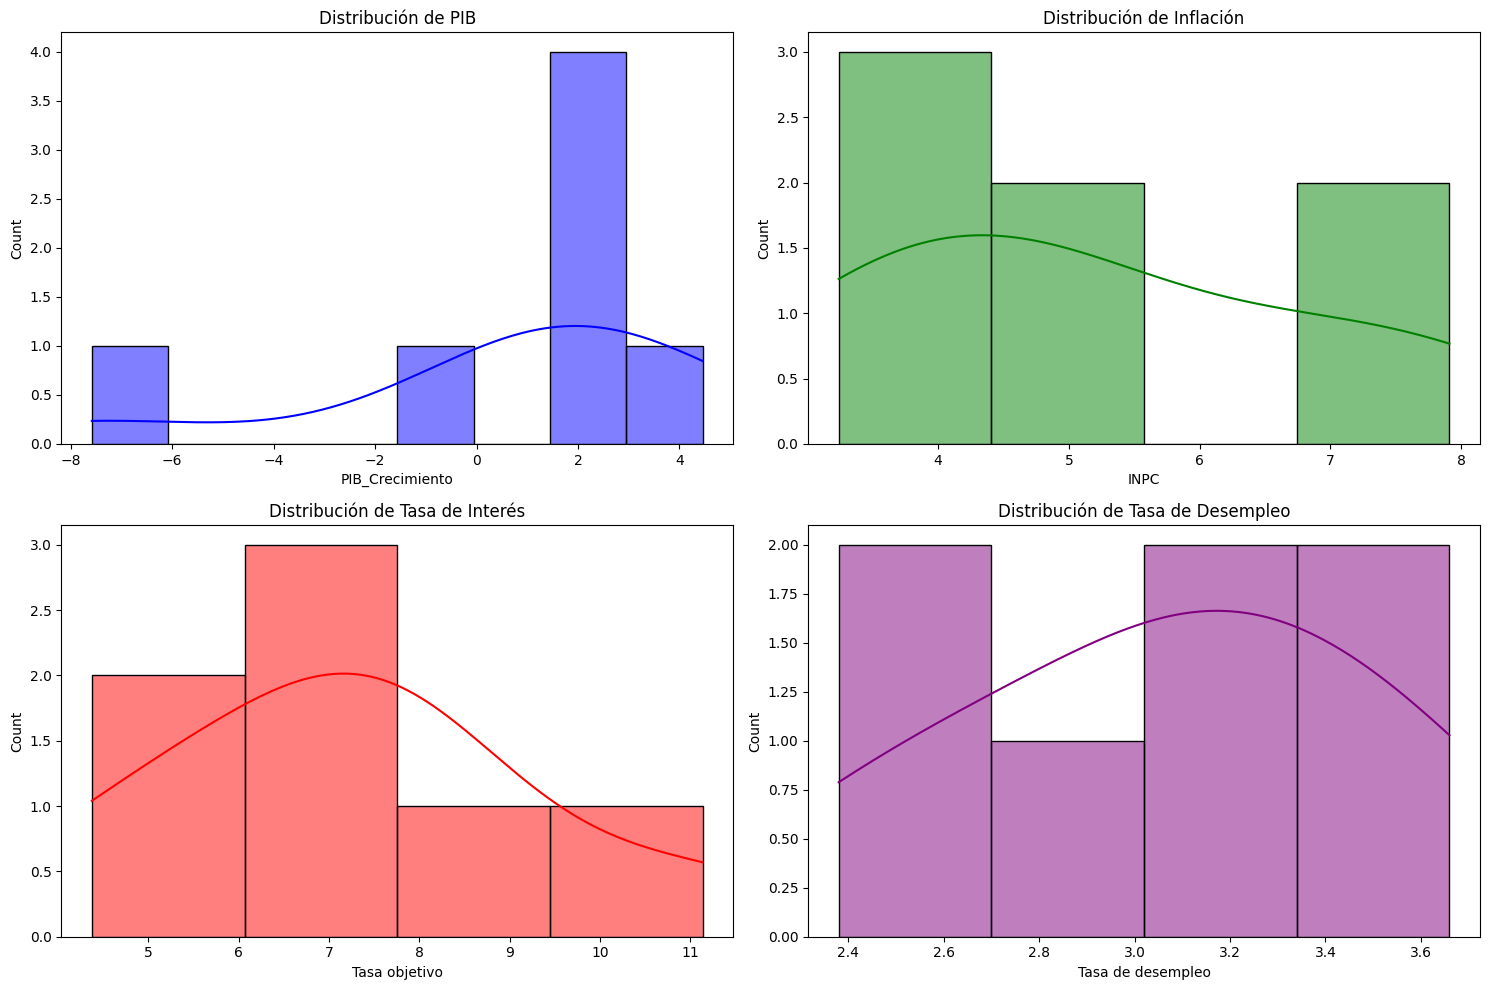

In [68]:

# Distribuciones de las variables
plt.figure(figsize=(15, 10))

# Graficar PIB
plt.subplot(2, 2, 1)
sns.histplot(df_total['PIB_Crecimiento'], kde=True, color='blue')
plt.title("Distribución de PIB")

# Graficar Inflación
plt.subplot(2, 2, 2)
sns.histplot(df_total['INPC'], kde=True, color='green')
plt.title("Distribución de Inflación")

# Graficar Tasa de Interés
plt.subplot(2, 2, 3)
sns.histplot(df_total['Tasa objetivo'], kde=True, color='red')
plt.title("Distribución de Tasa de Interés")

# Graficar Tasa de Desempleo
plt.subplot(2, 2, 4)
sns.histplot(df_total['Tasa de desempleo'], kde=True, color='purple')
plt.title("Distribución de Tasa de Desempleo")

plt.tight_layout()
plt.show()


**Simulación de Monte Carlo**  

Usaremos **Monte Carlo** para generar miles de escenarios y calcular la probabilidad de cada fase económica.  

- Generamos valores aleatorios para el PIB, inflación y tasas de interés.  
- Usamos distribuciones de probabilidad basadas en datos históricos.  
- Corremos 10,000 simulaciones y calculamos cuántas veces cae cada escenario.  

**Distribucion de los indicadores despues de la simulacion**

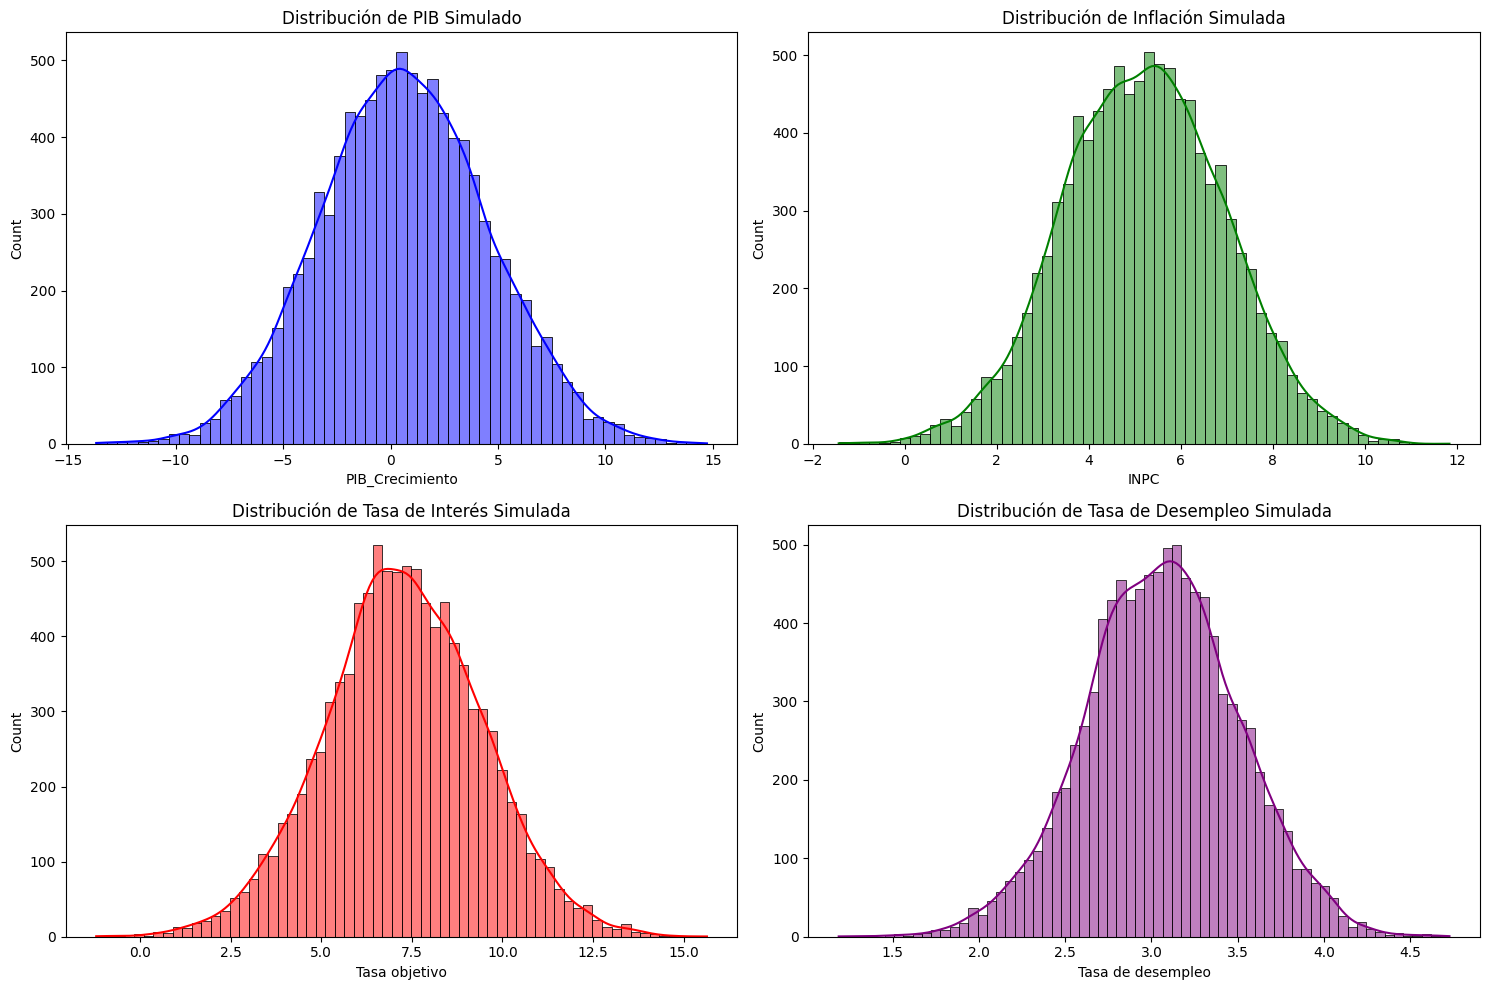

In [69]:

# Para crear los nuevos datos con Monte Carlo, vamos a definir una función para cada variable

# Obtener la media y desviación estándar de cada variable
mean_pib = df_total['PIB_Crecimiento'].mean()
std_pib = df_total['PIB_Crecimiento'].std()

mean_inflacion = df_total['INPC'].mean()
std_inflacion = df_total['INPC'].std()

mean_tasa_interes = df_total['Tasa objetivo'].mean()
std_tasa_interes = df_total['Tasa objetivo'].std()

mean_tasa_desempleo = df_total['Tasa de desempleo'].mean()
std_tasa_desempleo = df_total['Tasa de desempleo'].std()

# Generamos los nuevos datos para cada variable
n_simulaciones = 10000  # Número de simulaciones

simulacion_pib = np.random.normal(mean_pib, std_pib, n_simulaciones)
simulacion_inflacion = np.random.normal(mean_inflacion, std_inflacion, n_simulaciones)
simulacion_tasa_interes = np.random.normal(mean_tasa_interes, std_tasa_interes, n_simulaciones)
simulacion_tasa_desempleo = np.random.normal(mean_tasa_desempleo, std_tasa_desempleo, n_simulaciones)

# Creamos un DataFrame con los datos simulados
df_simulado = pd.DataFrame({
    'PIB_Crecimiento': simulacion_pib,
    'INPC': simulacion_inflacion,
    'Tasa objetivo': simulacion_tasa_interes,
    'Tasa de desempleo': simulacion_tasa_desempleo
})


# Visualizamos las distribuciones de los datos simulados
plt.figure(figsize=(15, 10))

# Graficar PIB simulado
plt.subplot(2, 2, 1)
sns.histplot(df_simulado['PIB_Crecimiento'], kde=True, color='blue')
plt.title("Distribución de PIB Simulado")

# Graficar Inflación simulada
plt.subplot(2, 2, 2)
sns.histplot(df_simulado['INPC'], kde=True, color='green')
plt.title("Distribución de Inflación Simulada")

# Graficar Tasa de Interés simulada
plt.subplot(2, 2, 3)
sns.histplot(df_simulado['Tasa objetivo'], kde=True, color='red')
plt.title("Distribución de Tasa de Interés Simulada")

# Graficar Tasa de Desempleo simulada
plt.subplot(2, 2, 4)
sns.histplot(df_simulado['Tasa de desempleo'], kde=True, color='purple')
plt.title("Distribución de Tasa de Desempleo Simulada")

plt.tight_layout()
plt.show()



##### 1.1.2. Modelado de Factores Económicos

Asignación de probabilidades a los cuatro escenarios económicos (expansión, normal, recesión, depresión).

**Modelado de Factores Económicos y Asignación de Probabilidades**

Para asignar probabilidades a los cuatro escenarios económicos (expansión, normal, recesión, depresión), debemos basarnos en indicadores macroeconómicos y modelos probabilísticos.  

**Definir los Escenarios Económicos**  

| **Escenario**  | **Crecimiento del PIB** | **Inflación** | **Tasas de interés** | **Empleo** |  
|---------------|--------------------|------------|----------------|---------|  
| **Expansión**  | >3%                 | >4%        | Bajando o estable | Alto    |  
| **Normal**     | 1% – 3%             | 2% – 4%    | Estables        | Estable |  
| **Recesión**   | -1% a 1%            | 1% – 2%   | Subiendo        | Bajo    |  
| **Depresión**  | < -1%               | <=0%       | Muy alto        | Muy bajo |  

📊 Explicación del Método probabilistico para definir los escenarios económicos

 **Ponderación de Variables**
Las variables macroeconómicas se ponderan según su impacto en la economía:

- **PIB (40%)** → Refleja directamente el crecimiento económico.  
- **Desempleo (30%)** → Un mercado laboral débil indica problemas estructurales.  
- **Inflación (20%)** → Puede coexistir con crecimiento económico en ciertos casos.  
- **Tasas de interés (10%)** → Afectan el crédito y la inversión, pero no siempre determinan el ciclo económico.  


**Conversión a Puntajes**
Cada variable se convierte en un **puntaje de 0 a 3** según umbrales específicos:

- **Ejemplo:**  
  - Un **PIB de 3%** obtiene un puntaje de **3** (*Expansión*).  
  - Un **PIB de -2%** obtiene un puntaje de **1** (*Recesión*).  



**Cálculo del Puntaje Total**
El puntaje total se obtiene mediante una **media ponderada** de las puntuaciones de cada variable.  

**Umbral para Determinar la Fase Económica**  

| Puntaje Total | Fase Económica |
|--------------|----------------|
| **≥ 2.5**   | 🟢 **Expansión** |
| **1.5 - 2.49** | 🟡 **Normal** |
| **0.5 - 1.49** | 🟠 **Recesión** |
| **< 0.5**  | 🔴 **Depresión** |


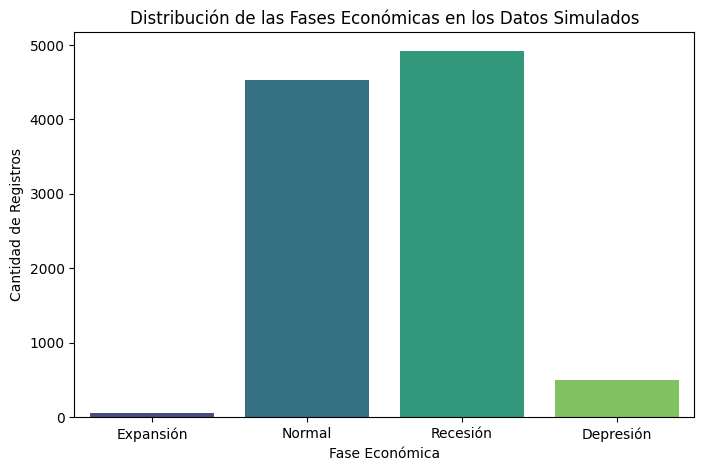

In [70]:

def clasificar_fase_economica_ponderada(row):
    # Asignación de pesos a cada variable macroeconómica
    pesos = {'PIB': 0.4, 'Inflación': 0.2, 'Desempleo': 0.3, 'Interés': 0.1}

    # Función auxiliar para convertir valores en puntuaciones (0=Depresión, 1=Recesión, 2=Normal, 3=Expansión)
    def puntuar(valor, umbrales):
        if valor > umbrales[0]:
            return 3  # Expansión
        elif valor > umbrales[1]:
            return 2  # Normal
        elif valor > umbrales[2]:
            return 1  # Recesión
        else:
            return 0  # Depresión

    # Definir umbrales de clasificación para cada variable
    umbrales = {
        'PIB': [2, 0, -4],           # PIB: Expansión (>2%), Normal (0 a 2%), Recesión (-4 a 0%), Depresión (< -4%)
        'Inflación': [4, 6, 10],      # Inflación: Expansión (<4%), Normal (4-6%), Recesión (6-10%), Depresión (>10%)
        'Desempleo': [4, 6, 10],      # Desempleo: Expansión (<4%), Normal (4-6%), Recesión (6-10%), Depresión (>10%)
        'Interés': [6, 8, 12]         # Tasa de Interés: Expansión (<6%), Normal (6-8%), Recesión (8-12%), Depresión (>12%)
    }

    # Obtener puntuaciones ponderadas
    puntaje_total = (
        puntuar(row['PIB_Crecimiento'], umbrales['PIB']) * pesos['PIB'] +
        puntuar(row['INPC'], umbrales['Inflación']) * pesos['Inflación'] +
        puntuar(row['Tasa de desempleo'], umbrales['Desempleo']) * pesos['Desempleo'] +
        puntuar(row['Tasa objetivo'], umbrales['Interés']) * pesos['Interés']
    )

    # Determinar la fase económica según el puntaje final
    if puntaje_total >= 2.5:
        return 'Expansión'
    elif puntaje_total >= 1.5:
        return 'Normal'
    elif puntaje_total >= 0.5:
        return 'Recesión'
    else:
        return 'Depresión'

# Aplicar la función a cada fila del DataFrame simulado
df_simulado['Fase_Economica'] = df_simulado.apply(clasificar_fase_economica_ponderada, axis=1)


# Gráfico de barras para ver la distribución de las fases económicas
plt.figure(figsize=(8,5))
sns.countplot(x=df_simulado['Fase_Economica'], palette="viridis", order=['Expansión', 'Normal', 'Recesión', 'Depresión'])
plt.title("Distribución de las Fases Económicas en los Datos Simulados")
plt.xlabel("Fase Económica")
plt.ylabel("Cantidad de Registros")
plt.show()

### 1.2. Modelos para Asignar Probabilidades  

**Modelos de Regresión Logística**

Entrenamos un modelo con datos históricos, donde la variable objetivo es la fase económica (expansión, normal, recesión, depresión) y las variables predictoras son el PIB, inflación, tasas de interés y empleo.  

$$
P(Y = \text{Escenario} \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \cdots + \beta_n X_n)}}
$$

Donde: $P(Y)$ es la probabilidad de estar en un escenario económico dado $X$ (las variables macroeconómicas).


$beta_0$ es el término independiente.

$beta_1$, $beta_2$, $dots$, $beta_n$ son los coeficientes que se estiman a partir de los datos históricos.

$X_1$, $X_2$, $dots$, $X_n$ son las variables explicativas (por ejemplo, PIB, tasa de interés, desempleo, etc.).


##### 📌 1.2.1 Preprocesamiento de Datos

In [71]:

# Codificar la variable categórica 'Fase_Economica' en números (Expansión=0, Normal=1, Recesión=2, Depresión=3)
label_encoder = LabelEncoder()
df_simulado['Fase_Economica'] = label_encoder.fit_transform(df_simulado['Fase_Economica'])

# Definir variables predictoras (X) y variable objetivo (y)
X = df_simulado[['PIB_Crecimiento', 'INPC', 'Tasa objetivo', 'Tasa de desempleo']]
y = df_simulado['Fase_Economica']

# Normalizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##### 📌 1.2.2 Entrenar el Modelo de Regresión Logística

In [72]:

# Inicializar y entrenar el modelo de Regresión Logística Multiclase
modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.867
Matriz de confusión:
 [[ 41   0   0  46]
 [  0   7   5   0]
 [  1   2 829  78]
 [ 24   0 110 857]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.62      0.47      0.54        87
           1       0.78      0.58      0.67        12
           2       0.88      0.91      0.89       910
           3       0.87      0.86      0.87       991

    accuracy                           0.87      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.86      0.87      0.86      2000



##### 📌 1.2.3 Backtesting con datos históricos

In [73]:
# Aplicar la función a cada fila del DataFrame simulado
df_total['Fase_Economica'] = df_total.apply(clasificar_fase_economica_ponderada, axis=1)
# Filtrar datos históricos de 2021 a 2023
df_backtest = df_total[(df_total['Año'] >= 2021) & (df_total['Año'] <= 2023)]

# Extraer las variables predictoras y la variable objetivo
X_backtest = df_backtest[['PIB_Crecimiento', 'INPC', 'Tasa objetivo', 'Tasa de desempleo']]
y_backtest_real = df_backtest['Fase_Economica']  # Fase económica real en esos años

# Normalizar los datos usando el mismo scaler entrenado
X_backtest_scaled = scaler.transform(X_backtest)

# Hacer predicciones con el modelo entrenado
y_backtest_pred = modelo.predict(X_backtest_scaled)

# Mostrar las predicciones
df_backtest['Fase_Predicha'] = label_encoder.inverse_transform(y_backtest_pred)
df_backtest[['Año', 'Fase_Economica', 'Fase_Predicha']]


Año Fase_Economica Fase_Predicha
4  2021       Recesión        Normal
5  2022         Normal        Normal
6  2023         Normal        Normal

In [74]:


# Suponiendo que el encoder se usó en el entrenamiento
label_encoder = LabelEncoder()
label_encoder.fit(['Expansión', 'Normal', 'Recesión', 'Depresión'])  # Reemplazar con las fases correctas

# Convertir predicciones numéricas a etiquetas de texto
y_backtest_pred_labels = label_encoder.inverse_transform(y_backtest_pred)

# Evaluar precisión del modelo en backtesting
accuracy = accuracy_score(y_backtest_real, y_backtest_pred_labels)
print(f'Precisión del modelo en backtesting: {accuracy:.2%}')


Precisión del modelo en backtesting: 66.67%


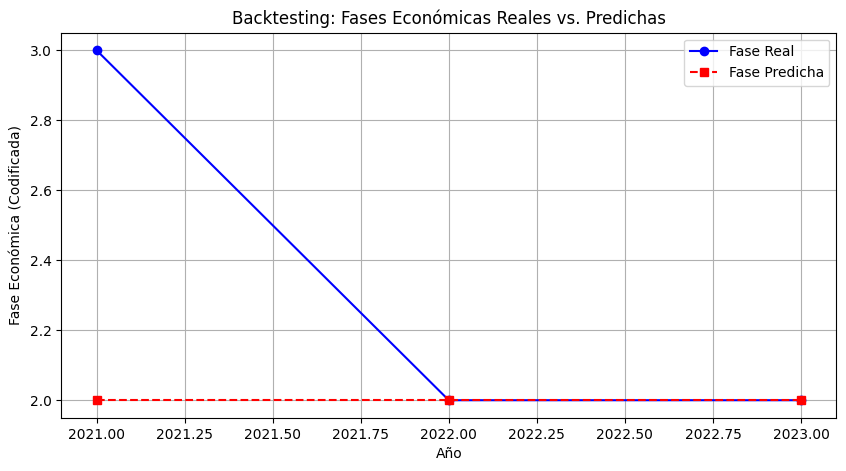

In [75]:


label_encoder = LabelEncoder()
label_encoder.fit(['Expansión', 'Normal', 'Recesión', 'Depresión'])  # Definir el orden de las fases

# Convertir la variable real a valores numéricos si es de tipo texto
if y_backtest_real.dtype == 'object':
    y_backtest_real = label_encoder.transform(y_backtest_real)

# Convertir la variable predicha a valores numéricos si es de tipo texto
if isinstance(y_backtest_pred[0], str):
    y_backtest_pred = label_encoder.transform(y_backtest_pred)

# Graficar después de asegurarnos de que ambas son numéricas
plt.figure(figsize=(10, 5))
plt.plot(df_backtest['Año'], y_backtest_real, marker='o', linestyle='-', label='Fase Real', color='blue')
plt.plot(df_backtest['Año'], y_backtest_pred, marker='s', linestyle='--', label='Fase Predicha', color='red')
plt.xlabel('Año')
plt.ylabel('Fase Económica (Codificada)')
plt.title('Backtesting: Fases Económicas Reales vs. Predichas')
plt.legend()
plt.grid()
plt.show()


##### 📌 1.2.4 Calcular Probabilidades para Nuevos Datos


In [76]:
# Valores 2024 de PIB, Inflación, Tasa de interés y Desempleo
datos_actuales = np.array([[1.89, 4.88, 9.5,2.34]])  

# Normalizar los datos con el mismo scaler
datos_actuales_scaled = scaler.transform(datos_actuales)

# Obtener las probabilidades para cada fase económica
probabilidades = modelo.predict_proba(datos_actuales_scaled)

# Mostrar las probabilidades con los nombres de las fases
fases_economicas = label_encoder.classes_
prob_dict = dict(zip(fases_economicas, probabilidades[0]))

# Convertir el diccionario en un DataFrame
df = pd.DataFrame(list(prob_dict.items()), columns=['Fase Económica', 'Probabilidad'])

# Convertir los valores a porcentaje (multiplicar por 100)
df['Probabilidad (%)'] = df['Probabilidad'] * 100

# Formatear los valores para que se muestren con 2 decimales
df['Probabilidad (%)'] = df['Probabilidad (%)'].apply(lambda x: f"{x:.2f}%")

# Mostrar el DataFrame
df

Fase Económica  Probabilidad Probabilidad (%)
0      Depresión  1.070652e-04            0.01%
1      Expansión  1.877584e-08            0.00%
2         Normal  7.994489e-01           79.94%
3       Recesión  2.004440e-01           20.04%

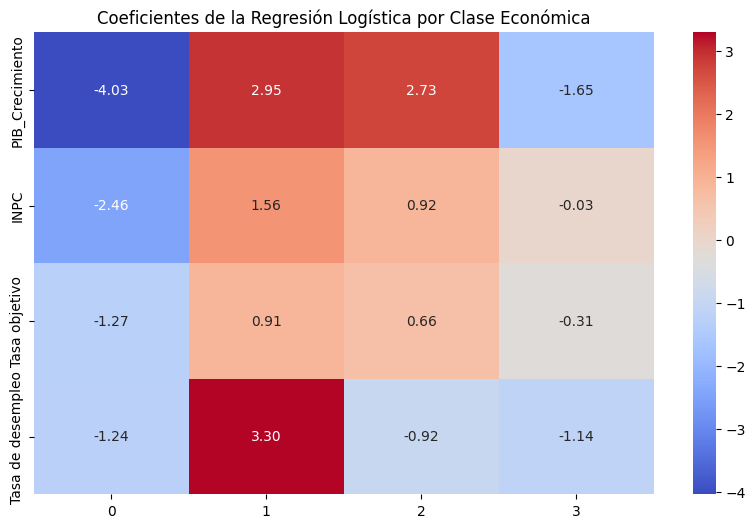

In [77]:
# Obtener los coeficientes del modelo
coeficientes = modelo.coef_

# Crear un DataFrame para visualizar los coeficientes de manera más clara
coef_df = pd.DataFrame(coeficientes.T, columns=modelo.classes_, index=X.columns)
# Visualización de los coeficientes
plt.figure(figsize=(10, 6))
sns.heatmap(coef_df, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Coeficientes de la Regresión Logística por Clase Económica")
plt.show()



---

### 1.3 Precios históricos

Analizar el precio de Stelarhe desde que salio la preventa en 2021


In [78]:

# Cargar la base de datos
df_precios_h = pd.read_excel("C:/Users/julio_2h7cnt5/OneDrive/Documentos/Ideas Frescas/Sthelare/Precios Historicos/Base de datos precios historicos.xlsx")  # Reemplaza con el nombre correcto del archivo

# Ver las primeras filas del dataset
df_precios_h.head()

Año Precios  No.  Nivel Modelo  Torre  Recamaras      Status  M² Depto  \
0  2021-05-19    1      1     A1      2          1   BLOQUEADO    113.57   
1  2021-05-19    2      1     B3      2          1   BLOQUEADO     83.65   
2  2021-05-19    3      2     A2      1          2  DISPONIBLE    157.38   
3  2021-05-19    4      2     A2      2          2  DISPONIBLE    157.38   
4  2021-05-19    5      2     B1      1          2  DISPONIBLE    121.22   

   M² Terraza  M2 Planos     Precio  
0       29.45     143.02  6291464.0  
1       12.00      95.65  5152940.0  
2       43.76     201.14  8822242.0  
3       43.76     201.14  8297421.0  
4       15.87     137.09  5914762.0

📌 1.3.1. Calcular el Precio por Metro Cuadrado

In [79]:
# Crear la columna "Precio Metro Cuadrado"
df_precios_h["Precio Metro Cuadrado"] = df_precios_h["Precio"] / df_precios_h["M2 Planos"]

# Verificar los cambios
df_precios_h.head()

Año Precios  No.  Nivel Modelo  Torre  Recamaras      Status  M² Depto  \
0  2021-05-19    1      1     A1      2          1   BLOQUEADO    113.57   
1  2021-05-19    2      1     B3      2          1   BLOQUEADO     83.65   
2  2021-05-19    3      2     A2      1          2  DISPONIBLE    157.38   
3  2021-05-19    4      2     A2      2          2  DISPONIBLE    157.38   
4  2021-05-19    5      2     B1      1          2  DISPONIBLE    121.22   

   M² Terraza  M2 Planos     Precio  Precio Metro Cuadrado  
0       29.45     143.02  6291464.0           43990.099287  
1       12.00      95.65  5152940.0           53872.869838  
2       43.76     201.14  8822242.0           43861.201153  
3       43.76     201.14  8297421.0           41251.968778  
4       15.87     137.09  5914762.0           43145.101758

📌 1.3.2. Calcular el Incremento Porcentual Anual del Modelo exacto

In [80]:

# Agrupar por Año, Nivel, Modelo y Torre y calcular el precio promedio por metro cuadrado
df_grouped = df_precios_h.groupby(["Año Precios", "Nivel", "Modelo", "Torre"])["Precio Metro Cuadrado"].mean().reset_index()

# Calcular el incremento porcentual anual dentro de cada grupo específico
df_grouped["Incremento %"] = df_grouped.groupby(["Nivel", "Modelo", "Torre"])["Precio Metro Cuadrado"].pct_change() * 100

# Verificar los datos
df_grouped.tail()


Año Precios  Nivel Modelo  Torre  Precio Metro Cuadrado  Incremento %
985  2025-02-25     28   Jr.2      2           93462.694320      3.030675
986  2025-02-25     30    M.1      1           66808.671486     -4.986036
987  2025-02-25     30    M.1      2           89121.625322      1.397033
988  2025-02-25     30    M.2      1          102588.503997      4.301366
989  2025-02-25     30    M.2      2           92194.306983     -6.266377

Modelos con mayor incremento % en el ultimo año 

In [81]:

import plotly.express as px

# Agrupar por "Año Precios" y "Modelo" para calcular el promedio del incremento %
df_incremento_anual = df_grouped.groupby(["Año Precios", "Nivel", "Modelo", "Torre"])["Incremento %"].mean().reset_index()

# Ordenar por incremento % de mayor a menor y seleccionar los 10 principales modelos en el último año disponible
ultimo_anio = df_incremento_anual["Año Precios"].max()
df_top10_anual = df_incremento_anual[df_incremento_anual["Año Precios"] == ultimo_anio].sort_values(by="Incremento %", ascending=False).head(15)

# Crear una nueva columna que combine Modelo, Nivel y Torre
df_top10_anual["Modelo Detallado"] = df_top10_anual.apply(lambda x: f"{x['Modelo']} (Nivel {x['Nivel']}, Torre {x['Torre']})", axis=1)

# Crear la gráfica de barras con la nueva columna
fig = px.bar(
    df_top10_anual,
    x="Modelo Detallado",
    y="Incremento %",
    text="Incremento %",
    title=f"Top 10 Modelos con mayor Incremento % en {ultimo_anio}",
    labels={"Incremento %": "Incremento Promedio (%)", "Modelo Detallado": "Modelo (Nivel, Torre)"},
    color="Incremento %",
    color_continuous_scale="Blues"
)

# Ajustar formato del texto en las barras
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Ajustar diseño para mejor legibilidad
fig.update_layout(xaxis_tickangle=-45)

# Mostrar la gráfica
fig.show()



📌 1.3.3. Evolución historica del incremnto % anual del precio por Metro Cuadrado por Modelo

In [82]:

import plotly.express as px

# Crear una nueva columna que combine Nivel, Modelo y Torre
df_grouped["Modelo Detallado"] = df_grouped.apply(lambda x: f"{x['Modelo']} (Nivel {x['Nivel']}, Torre {x['Torre']})", axis=1)

# Crear la gráfica de líneas del Incremento %
fig = px.line(
    df_grouped, 
    x="Año Precios", 
    y="Incremento %", 
    color="Modelo Detallado", 
    markers=True,  # Agregar puntos a la línea
    title="Evolución del Incremento % Anual del Precio por Metro Cuadrado",
    labels={"Incremento %": "Incremento Anual (%)", "Año Precios": "Año"},
    line_shape="linear"
)

# Mostrar la gráfica interactiva
fig.show()




📌 1.3.4. Calcular el Incremento Porcentual historico por Modelo

In [83]:

# Obtener el primer y último precio por metro cuadrado por modelo
df_incremento_total = df_grouped.groupby(["Nivel", "Modelo", "Torre"]).agg(
    Precio_Inicial=("Precio Metro Cuadrado", "first"),
    Precio_Final=("Precio Metro Cuadrado", "last")
).reset_index()

# Calcular el incremento total
df_incremento_total["Incremento Total %"] = ((df_incremento_total["Precio_Final"] - df_incremento_total["Precio_Inicial"]) / df_incremento_total["Precio_Inicial"]) * 100

# Ver los resultados
df_incremento_total.tail()


Nivel Modelo  Torre  Precio_Inicial   Precio_Final  Incremento Total %
211     28   Jr.2      2    55688.839832   93462.694320           67.830205
212     30    M.1      1    58330.344947   66808.671486           14.535019
213     30    M.1      2    55534.180571   89121.625322           60.480670
214     30    M.2      1    59167.770264  102588.503997           73.385787
215     30    M.2      2    55667.515588   92194.306983           65.615990

In [84]:

import plotly.express as px

# Ordenar por Incremento Total % de mayor a menor y seleccionar los 10 principales
df_top10 = df_incremento_total.sort_values(by="Incremento Total %", ascending=False).head(10)

# Crear una nueva columna que combine Modelo, Nivel y Torre
df_top10["Modelo Detallado"] = df_top10.apply(lambda x: f"{x['Modelo']} (Nivel {x['Nivel']}, Torre {x['Torre']})", axis=1)

# Crear la gráfica de barras con la nueva columna
fig = px.bar(
    df_top10,
    x="Modelo Detallado",
    y="Incremento Total %",
    text="Incremento Total %",
    title=f"Top 10 Modelos con mayor Incremento % histórico",
    labels={"Incremento Total %": "Incremento Total (%)", "Modelo Detallado": "Modelo (Nivel, Torre)"},
    color="Incremento Total %",
    color_continuous_scale="Blues"
)

# Ajustar formato del texto en las barras
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Ajustar diseño para mejor legibilidad
fig.update_layout(xaxis_tickangle=-45)

# Mostrar la gráfica
fig.show()



📌 1.3.5. Incremento Porcentual Anual por Modelo vendido

In [85]:

# Asegurar que 'Año Precios' es datetime y extraer el año
df_precios_h["Año Precios"] = pd.to_datetime(df_precios_h["Año Precios"])
df_precios_h["Año"] = df_precios_h["Año Precios"].dt.year

# Obtener los modelos, niveles y torres que en 2025 están "VENDIDO" o "BLOQUEADO"
modelos_2025 = df_precios_h[(df_precios_h["Año"] == 2025) & df_precios_h["Status"].isin(["VENDIDO", "BLOQUEADO"])][["Modelo", "Nivel", "Torre"]]

# Filtrar registros del 2021 que correspondan a los modelos identificados en 2025
df_2021 = df_precios_h[(df_precios_h["Año"] == 2021)].merge(modelos_2025, on=["Modelo", "Nivel", "Torre"], how="inner")

# Filtrar registros de 2022 en adelante solo con Status 'VENDIDO' o 'BLOQUEADO'
df_post_2021 = df_precios_h[(df_precios_h["Año"] > 2021) & df_precios_h["Status"].isin(["VENDIDO", "BLOQUEADO"])]

# Unir ambos DataFrames
df_relevante = pd.concat([df_2021, df_post_2021])

# Agrupar por Año, Nivel, Modelo y Torre y calcular el precio promedio por metro cuadrado
df_grouped_v = df_relevante.groupby(["Año Precios", "Nivel", "Modelo", "Torre"])["Precio Metro Cuadrado"].mean().reset_index()

# Calcular el incremento porcentual anual dentro de cada grupo específico
df_grouped_v["Incremento %"] = df_grouped_v.groupby(["Nivel", "Modelo", "Torre"])["Precio Metro Cuadrado"].pct_change() * 100

# Verificar los datos
df_grouped_v.tail()



Año Precios  Nivel Modelo  Torre  Precio Metro Cuadrado  Incremento %
383  2025-02-25     27     B2      2           48394.653148    -13.928088
384  2025-02-25     27     C1      1           59684.427167     20.461538
385  2025-02-25     27     C1      2           57672.078665      0.000000
386  2025-02-25     28   Jr.1      1           42781.208977      0.000000
387  2025-02-25     30    M.1      1           66808.671486     -4.986036

In [86]:
# Agrupar por "Año Precios" y "Modelo" para calcular el promedio del incremento %
df_incremento_anual = df_grouped_v.groupby(["Año Precios", "Nivel", "Modelo", "Torre"])["Incremento %"].mean().reset_index()

# Ordenar por incremento % de mayor a menor y seleccionar los 10 principales modelos en el último año disponible
ultimo_anio = df_incremento_anual["Año Precios"].max()
df_top10_anual = df_incremento_anual[df_incremento_anual["Año Precios"] == ultimo_anio].sort_values(by="Incremento %", ascending=False).head(10)

# Crear una nueva columna que combine Modelo, Nivel y Torre
df_top10_anual["Modelo Detallado"] = df_top10_anual.apply(lambda x: f"{x['Modelo']} (Nivel {x['Nivel']}, Torre {x['Torre']})", axis=1)

# Crear la gráfica de barras con la nueva columna
fig = px.bar(
    df_top10_anual,
    x="Modelo Detallado",
    y="Incremento %",
    text="Incremento %",
    title=f"Top 10 Modelos con mayor Incremento % Vendidos en {ultimo_anio}",
    labels={"Incremento %": "Incremento Promedio (%)", "Modelo Detallado": "Modelo (Nivel, Torre)"},
    color="Incremento %",
    color_continuous_scale="Blues"
)

# Ajustar formato del texto en las barras
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Ajustar diseño para mejor legibilidad
fig.update_layout(xaxis_tickangle=-45)

# Mostrar la gráfica
fig.show()

📌 1.3.6. Calcular el Incremento Porcentual historico por Modelo 

In [87]:
# Obtener el primer y último precio por metro cuadrado por modelo
df_incremento_total = df_grouped_v.groupby(["Nivel", "Modelo", "Torre"]).agg(
    Precio_Inicial=("Precio Metro Cuadrado", "first"),
    Precio_Final=("Precio Metro Cuadrado", "last")
).reset_index()

# Calcular el incremento total
df_incremento_total["Incremento Total %"] = ((df_incremento_total["Precio_Final"] - df_incremento_total["Precio_Inicial"]) / df_incremento_total["Precio_Inicial"]) * 100

# Ver los resultados
df_incremento_total

Nivel Modelo  Torre  Precio_Inicial  Precio_Final  Incremento Total %
0        1     A1      2    50988.526080  50988.526080            0.000000
1        1     B3      2    62443.544171  62443.544171            0.000000
2        2     A2      1    43861.201153  49746.078851           13.417046
3        2     B1      1    43145.101758  42262.585455           -2.045461
4        2     B2      2    40933.576483  48394.653148           18.227278
..     ...    ...    ...             ...           ...                 ...
108     27     C1      1    53056.848845  59684.427167           12.491466
109     27     C1      2    49803.712173  57672.078665           15.798755
110     28   Jr.1      1    58126.064881  42781.208977          -26.399268
111     28   Jr.2      1    74203.242682  74203.242682            0.000000
112     30    M.1      1    58330.344947  66808.671486           14.535019

[113 rows x 6 columns]

In [88]:
# Ordenar por Incremento Total % de mayor a menor y seleccionar los 10 principales
df_top10 = df_incremento_total.sort_values(by="Incremento Total %", ascending=False).head(10)

# Crear una nueva columna que combine Modelo, Nivel y Torre
df_top10["Modelo Detallado"] = df_top10.apply(lambda x: f"{x['Modelo']} (Nivel {x['Nivel']}, Torre {x['Torre']})", axis=1)

# Crear la gráfica de barras con la nueva columna
fig = px.bar(
    df_top10,
    x="Modelo Detallado",
    y="Incremento Total %",
    text="Incremento Total %",
    title=f"Top 10 Modelos con mayor Incremento % histórico",
    labels={"Incremento Total %": "Incremento Total (%)", "Modelo Detallado": "Modelo (Nivel, Torre)"},
    color="Incremento Total %",
    color_continuous_scale="Blues"
)

# Ajustar formato del texto en las barras
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Ajustar diseño para mejor legibilidad
fig.update_layout(xaxis_tickangle=-45)

# Mostrar la gráfica
fig.show()

📌 1.3.7. Calcular el Incremento Porcentual Anual Real

In [89]:

# Agrupar por Año Precios, Modelo y calcular el precio promedio por metro cuadrado
df_grouped_year = df_grouped_v.groupby(["Año Precios"])["Incremento %"].mean().reset_index()

# Verificar los datos
df_grouped_year.tail()


Año Precios  Incremento %
0  2021-05-19           NaN
1  2022-11-16     13.636363
2  2023-05-01      7.044435
3  2024-02-01      2.689643
4  2025-02-25      0.856625

In [90]:

# Crear gráfico interactivo
fig = px.line(df_grouped_year, x="Año Precios", y="Incremento %", 
              title="Incremento Porcentual Anual Promedio por Año",
              labels={"Año Precios": "Año", "Incremento %": "Incremento Porcentual (%)"})

# Mostrar el gráfico
fig.show()


📌 1.3.8. Modelo Matemático para el Incremento Real de la Torre

In [91]:

# Asegurar que 'Año Precios' es datetime y extraer el año
df_precios_h["Año Precios"] = pd.to_datetime(df_precios_h["Año Precios"])
df_precios_h["Año"] = df_precios_h["Año Precios"].dt.year

# Obtener los modelos, niveles y torres que en 2025 están "VENDIDO" o "BLOQUEADO"
modelos_2025 = df_precios_h[df_precios_h["Año"] == 2025 & df_precios_h["Status"].isin(["VENDIDO", "BLOQUEADO"])][["Modelo", "Nivel", "Torre"]]

# Filtrar registros del 2021 que correspondan a los modelos identificados en 2025
df_2021 = df_precios_h[(df_precios_h["Año"] == 2021)].merge(modelos_2025, on=["Modelo", "Nivel", "Torre"], how="inner")

# Filtrar registros de 2022 en adelante solo con Status 'VENDIDO' o 'BLOQUEADO'
df_post_2021 = df_precios_h[(df_precios_h["Año"] > 2021) & df_precios_h["Status"].isin(["VENDIDO", "BLOQUEADO"])]

# Unir ambos DataFrames
df_relevante = pd.concat([df_2021, df_post_2021])

# Agrupar por Año, Nivel, Modelo y Torre y calcular el precio promedio por metro cuadrado
df_grouped_v = df_relevante.groupby(["Año Precios", "Nivel", "Modelo", "Torre","M2 Planos"])["Precio Metro Cuadrado"].mean().reset_index()

# Calcular el incremento porcentual anual dentro de cada grupo específico
df_grouped_v["Incremento %"] = df_grouped_v.groupby(["Nivel", "Modelo", "Torre","M2 Planos"])["Precio Metro Cuadrado"].pct_change() * 100

# Agrupar por año y calcular el promedio ponderado de incremento
df_torre = df_grouped_v.groupby("Año Precios").apply(
    lambda x: np.average(x["Precio Metro Cuadrado"], weights=x["M2 Planos"])
).reset_index(name="Precio Ponderado")

# Calcular el incremento porcentual anual
df_torre["Incremento %"] = df_torre["Precio Ponderado"].pct_change() * 100

# Mostrar resultados finales
df_torre

#0.982708
# -0.5  # Ajuste para depresión
# 7.780355   # Ajuste para expansión
#0.429069 

Año Precios  Precio Ponderado  Incremento %
0  2022-11-16      52679.902422           NaN
1  2023-05-01      52905.935689      0.429069
2  2024-02-01      53425.846761      0.982708
3  2025-02-25      53173.488655     -0.472352

In [92]:
# Agrupar por Año, Nivel, Modelo y Torre y calcular el precio promedio por metro cuadrado
df_grouped_v = df_precios_h.groupby(["Año Precios", "Nivel", "Modelo", "Torre","M2 Planos"])["Precio Metro Cuadrado"].mean().reset_index()

# Calcular el incremento porcentual anual dentro de cada grupo específico
df_grouped_v["Incremento %"] = df_grouped_v.groupby(["Nivel", "Modelo", "Torre","M2 Planos"])["Precio Metro Cuadrado"].pct_change() * 100

# Agrupar por año y calcular el promedio ponderado de incremento
df_torre = df_grouped_v.groupby("Año Precios").apply(
    lambda x: np.average(x["Precio Metro Cuadrado"], weights=x["M2 Planos"])
).reset_index(name="Precio Ponderado")

# Calcular el incremento porcentual anual
df_torre["Incremento %"] = df_torre["Precio Ponderado"].pct_change() * 100

# Mostrar resultados finales
df_torre


Año Precios  Precio Ponderado  Incremento %
0  2021-05-19      48422.867537           NaN
1  2022-11-16      55924.790743     15.492522
2  2023-05-01      59955.349317      7.207105
3  2024-02-01      61199.465207      2.075071
4  2025-02-25      64358.572225      5.161985

In [93]:

import plotly.express as px

# Crear la gráfica interactiva de barras con Plotly
fig = px.bar(df_torre, 
             x="Año Precios", 
             y="Incremento %", 
             color="Año Precios", 
             color_continuous_scale="viridis", 
             labels={"Incremento %": "Incremento % Anual Ponderado", "Año Precios": "Año"},
             title="Incremento Anual Ponderado del Precio en Toda la Torre")

# Configuración de la leyenda y estilo
fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Incremento % Anual Ponderado",
    template="plotly_white"
)

# Mostrar la gráfica interactiva
fig.show()




---

### 📌 2. Asignar Incrementos de Precios por Fase Económica

Primero, tienes que asignar un porcentaje de incremento de precio para cada fase económica. Te doy un ejemplo con incrementos posibles:

In [95]:

df_escenarios =df.copy()

# Crear un diccionario con los incrementos de precio para cada fase económica
fase_incremento = {
    "Depresión": df_torre['Incremento %'].iloc[3],        # 5% de incremento en la fase de Depresión
    "Expansión": df_torre['Incremento %'].iloc[1],       # 10% de incremento en la fase de Expansión
    "Normal": df_torre['Incremento %'].iloc[2],           
    "Recesión": df_torre['Incremento %'].iloc[4]       
}

# Asignar el incremento de precio en base a la fase económica
df_escenarios["Incremento % Precio Metro Cuadrado"] = df_escenarios["Fase Económica"].map(fase_incremento)

# Ver los resultados
df_escenarios

Fase Económica  Probabilidad Probabilidad (%)  \
0      Depresión  1.070652e-04            0.01%   
1      Expansión  1.877584e-08            0.00%   
2         Normal  7.994489e-01           79.94%   
3       Recesión  2.004440e-01           20.04%   

   Incremento % Precio Metro Cuadrado  
0                            2.075071  
1                           15.492522  
2                            7.207105  
3                            5.161985

##### **Rendimiento medio aritmético**

**Rendimiento esperado** como el promedio ponderado (valor esperado) por probabilidad de los posibles resultados.

Esto es

$$E[r]=\sum_{j=1}^{m}p_jr_j,$$

donde $r_j$ para $j=1,2,\dots,m$ son los posibles rendimientos y $p_j$ es la probabilidad asociada a que ocurra el rendimiento $r_j$.

In [43]:

Er = (df_escenarios['Probabilidad'] * df_escenarios['Incremento % Precio Metro Cuadrado']).sum()

print(f"El rendimiento esperado del incremento % del precio por metro cuadrado es: {Er:.2f}%")

El rendimiento esperado del incremento % del precio por metro cuadrado es: 6.77%


**La volatilidad como medida de riesgo**


Dado que el riesgo está estrechamente relacionado con *cuánto no sabemos* acerca de lo que va a pasar, lo podemos cantificar con alguna medida de dispersión de la variable aleatoria de rendimientos.

Si estamos analizando precios de bienes raíces, esta volatilidad sugiere que los precios pueden fluctuar significativamente.

In [44]:

# Calculamos varianza
sr2 = (df_escenarios['Probabilidad'] * (df_escenarios['Incremento % Precio Metro Cuadrado'] - Er)**2).sum()
# Calculamos volatilidad
sr = sr2**0.5
sr

np.float64(0.8419257972471624)


---

📌 2.1 Simulación de Monte Carlo para Escenarios Futuro (2025-2027)

Una vez asignados los incrementos, podemos realizar una simulación de Monte Carlo para ver los posibles resultados futuros. Vamos a crear una función para la simulación.
Simulación de Monte Carlo

**Resultado Simulación Precios Anuales por Metro cuadrado para Escenarios Futuro (2025-2027)**

In [45]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]

# Copia del DataFrame original
df_torre_1 = df_torre.copy()

# Calcular la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = df_torre_1["Incremento %"].iloc[-3:].mean() / 100
precio_inicial = df_torre_1["Precio Ponderado"].iloc[-1] * (1 + tendencia_reciente)

# Contenedor para los resultados de las simulaciones
simulaciones = []

# Realizar la simulación Monte Carlo
for _ in range(num_simulaciones):
    precios_simulados = [precio_inicial]

    for año in años_simulados:
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()
        
        # Ajustar probabilidades si hay una tendencia reciente bajista
        if tendencia_reciente < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar
        
        # Elegir un incremento probable basado en los escenarios
        incremento_probable = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
        precios_simulados.append(nuevo_precio)

    # Almacenar los resultados de la simulación
    simulaciones.append(precios_simulados)

# Convertir las simulaciones a un array para facilitar el análisis
simulaciones = np.array(simulaciones)

# Calcular los resultados promedio por año
promedio_simulaciones = np.mean(simulaciones, axis=0)

# Mostrar los resultados de las simulaciones
print("Promedio de las simulaciones para cada año:", promedio_simulaciones[1:])


Promedio de las simulaciones para cada año: [72020.77500854 76891.69926247 82090.99105732]


In [46]:

df_torre_1 = df_torre.copy()

# Simulaciones de precios para los próximos años
años_simulados_1 = años_simulados
promedio_simulaciones_1 = list(promedio_simulaciones[1:])

# Crear un DataFrame con las simulaciones de precios y años
simulaciones = pd.DataFrame({
    'Año Precios': [f"{año}-01-01" for año in años_simulados_1],
    'Precio Ponderado':promedio_simulaciones_1,
    'Incremento %': [None] * len(años_simulados_1)
})

# Concatenar el DataFrame original con las simulaciones
df_torre_1 = pd.concat([df_torre_1, simulaciones], ignore_index=True)
# Calcular el Incremento % para los años donde el precio ponderado no es NaN
df_torre_1["Incremento %"] = df_torre_1["Precio Ponderado"].pct_change() * 100
df_torre_1.loc[5, "Año Precios"] = "2025-12-01"
df_torre_1.loc[6, "Año Precios"] = "2026-12-01"
df_torre_1.loc[7, "Año Precios"] = "2027-12-01"
# Convertir la columna de fechas a tipo datetime
df_torre_1["Año Precios"] = pd.to_datetime(df_torre_1["Año Precios"])

#df_torre_1.to_csv("Pronostico Precio Stelarhe.csv", index=False, encoding='utf-8')
# Mostrar el DataFrame resultante
df_torre_1

Año Precios  Precio Ponderado  Incremento %
0  2021-05-19      48422.867537           NaN
1  2022-11-16      55924.790743     15.492522
2  2023-05-01      59955.349317      7.207105
3  2024-02-01      61199.465207      2.075071
4  2025-02-25      64358.572225      5.161985
5  2025-12-01      72020.775009     11.905489
6  2026-12-01      76891.699262      6.763221
7  2027-12-01      82090.991057      6.761838

In [47]:
# Exportar el resultado a CSV
#df_torre_1.to_csv("Pronostico Precio Torre Stelarhe.csv", index=False, encoding='utf-8')


Simulacion con precios hisotiros considera vendidos y disponilbes



In [48]:

# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

incremento_normal_ov = 0.982708
incremento_depresion_ov = -0.5  # Ajuste para depresión
incremento_expansion_ov = 7.780355   # Ajuste para expansión
incremento_recesion_ov =  0.429069   # Ajuste para recesión


df_escenarios["Incremento % Precio Metro Cuadrado"] = [
    incremento_depresion_ov, incremento_expansion_ov, incremento_normal_ov, incremento_recesion_ov
]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente_ov = df_grouped["Incremento %"].iloc[-3:].mean() / 100
precio_inicial_ov = df_grouped["Precio Metro Cuadrado"].iloc[-1] * (1 + tendencia_reciente_ov)

# Contenedor de simulaciones para OceanView
simulaciones_ov = []

# Simulación Monte Carlo para OceanView
for _ in range(num_simulaciones):
    precios_simulados_ov = [precio_inicial_ov]

    for _ in range(len(trimestres_simulados)):
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

        # Ajustar probabilidades si hay tendencia reciente bajista
        if tendencia_reciente_ov < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

        # Elegir un incremento probable basado en los escenarios
        incremento_probable_ov = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio_ov = precios_simulados_ov[-1] * (1 + incremento_probable_ov / 100)
        precios_simulados_ov.append(nuevo_precio_ov)

    simulaciones_ov.append(precios_simulados_ov)

# Convertir simulaciones a array y calcular el promedio
simulaciones_ov = np.array(simulaciones_ov)
promedio_simulaciones_ov = np.mean(simulaciones_ov, axis=0)

# Resultados por trimestre para OceanView
resultados_trimestrales_ov = pd.DataFrame(
    list(zip(trimestres_simulados, promedio_simulaciones_ov[1:])),
    columns=["Trimestre", "Precio Simulación Stelarhe"]
)

# Mostrar el DataFrame con los resultados
resultados_trimestrales_ov


Trimestre  Precio Simulación Stelarhe
0    T1 2025                92815.495692
1    T2 2025                93621.225742
2    T3 2025                94425.878969
3    T4 2025                95242.771833
4    T1 2026                96067.040100
5    T2 2026                96895.979071
6    T3 2026                97730.820766
7    T4 2026                98576.763368
8    T1 2027                99433.704534
9    T2 2027               100291.458023
10   T3 2027               101157.250672
11   T4 2027               102033.569071

Precio Simulado para Proyecto mayores a 6.5 Millones 

In [49]:
# Crear un diccionario con los datos
ppmm = {
    "Fecha": [
        "01/03/2022", "01/08/2022","01/11/2022",
        "01/02/2023", "01/05/2023", "01/08/2023","01/11/2023",
        "01/02/2024", "01/05/2024", "01/08/2024","01/11/2024",
        "01/02/2025"
    ],
    "Precio promedio Mazatlan": [
        52596,56390,58066,
        63220,65296,63671,67749,
        62003,67229,61964,63716,
        65850

]
}
# Crear el DataFrame
ppmm = pd.DataFrame(ppmm)
# Convertir la columna de fechas a tipo datetime

# Calcular el incremento porcentual anual dentro de cada grupo específico
ppmm["Incremento %"] = ppmm["Precio promedio Mazatlan"].pct_change() * 100

ppmm["Fecha"] = pd.to_datetime(ppmm["Fecha"], format="%d/%m/%Y")

# Calcular el incremento porcentual
ppmm["Incremento %"] = ppmm["Precio promedio Mazatlan"].pct_change() * 100

# Calcular incremento en cada fase económica
incremento_normal = 0.982708
incremento_depresion = -0.5  # Ajuste para depresión
incremento_expansion = 7.780355   # Ajuste para expansión
incremento_recesion = 0.429069    # Ajuste para recesión

df_escenarios["Incremento % Precio Metro Cuadrado"] = [
    incremento_depresion, incremento_expansion, incremento_normal, incremento_recesion
]

# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = ppmm["Incremento %"].iloc[-3:].mean() / 100
precio_inicial = ppmm["Precio promedio Mazatlan"].iloc[-1] * (1 + tendencia_reciente)

# Contenedor de simulaciones
simulaciones = []

# Simulación Monte Carlo
for _ in range(num_simulaciones):
    precios_simulados = [precio_inicial]

    for _ in range(len(trimestres_simulados)):
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

        # Ajustar probabilidades si hay tendencia reciente bajista
        if tendencia_reciente < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

        # Elegir un incremento probable basado en los escenarios
        incremento_probable = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
        precios_simulados.append(nuevo_precio)

    simulaciones.append(precios_simulados)

# Convertir simulaciones a array y calcular el promedio
simulaciones = np.array(simulaciones)
promedio_simulaciones = np.mean(simulaciones, axis=0)

# Resultados por trimestre
resultados_trimestrales = dict(zip(trimestres_simulados, promedio_simulaciones[1:]))
# Definir los trimestres simulados
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Convertir los resultados trimestrales a DataFrame
df_resultados_trimestrales = pd.DataFrame(
    list(resultados_trimestrales.items()), columns=["Trimestre", "Precio Simulado 6.5 M"]
)

df_resultados_trimestrales

Trimestre  Precio Simulado 6.5 M
0    T1 2025           66051.939267
1    T2 2025           66623.108022
2    T3 2025           67199.229332
3    T4 2025           67779.385307
4    T1 2026           68362.922227
5    T2 2026           68953.389525
6    T3 2026           69550.928068
7    T4 2026           70152.776526
8    T1 2027           70758.093112
9    T2 2027           71369.698622
10   T3 2027           71982.811095
11   T4 2027           72604.434553

Precio Simulado para Proyecto mayores a 6.4 Millones o menos

In [50]:
# Crear un diccionario con los datos
ppmm = {
    "Fecha": [
        "01/03/2022", "01/08/2022","01/11/2022",
        "01/02/2023", "01/05/2023", "01/08/2023","01/11/2023",
        "01/02/2024", "01/05/2024", "01/08/2024","01/11/2024",
        "01/02/2025"
    ],
    "Precio promedio Mazatlan": [
        53781,57215,55952,
        59976,60510,60099,60823,
        62015,61881,65369,65312,
        62734

]
}
# Crear el DataFrame
ppmm = pd.DataFrame(ppmm)
# Convertir la columna de fechas a tipo datetime

# Calcular el incremento porcentual anual dentro de cada grupo específico
ppmm["Incremento %"] = ppmm["Precio promedio Mazatlan"].pct_change() * 100

ppmm["Fecha"] = pd.to_datetime(ppmm["Fecha"], format="%d/%m/%Y")

# Calcular el incremento porcentual
ppmm["Incremento %"] = ppmm["Precio promedio Mazatlan"].pct_change() * 100

# Calcular incremento en cada fase económica
incremento_normal = 0.982708
incremento_depresion = -0.5  # Ajuste para depresión
incremento_expansion = 7.780355   # Ajuste para expansión
incremento_recesion = 0.429069    # Ajuste para recesión

df_escenarios["Incremento % Precio Metro Cuadrado"] = [
    incremento_depresion, incremento_expansion, incremento_normal, incremento_recesion
]

# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = ppmm["Incremento %"].iloc[-3:].mean() / 100
precio_inicial = ppmm["Precio promedio Mazatlan"].iloc[-1] * (1 + tendencia_reciente)

# Contenedor de simulaciones
simulaciones = []

# Simulación Monte Carlo
for _ in range(num_simulaciones):
    precios_simulados = [precio_inicial]

    for _ in range(len(trimestres_simulados)):
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

        # Ajustar probabilidades si hay tendencia reciente bajista
        if tendencia_reciente < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

        # Elegir un incremento probable basado en los escenarios
        incremento_probable = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
        precios_simulados.append(nuevo_precio)

    simulaciones.append(precios_simulados)

# Convertir simulaciones a array y calcular el promedio
simulaciones = np.array(simulaciones)
promedio_simulaciones = np.mean(simulaciones, axis=0)

# Resultados por trimestre
resultados_trimestrales = dict(zip(trimestres_simulados, promedio_simulaciones[1:]))
# Definir los trimestres simulados
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Convertir los resultados trimestrales a DataFrame
df_resultados_trimestrales = pd.DataFrame(
    list(resultados_trimestrales.items()), columns=["Trimestre", "Precio Simulado 6.5 M"]
)

df_resultados_trimestrales

Trimestre  Precio Simulado 6.5 M
0    T1 2025           63615.456174
1    T2 2025           64163.544207
2    T3 2025           64717.930387
3    T4 2025           65275.178184
4    T1 2026           65837.137272
5    T2 2026           66402.924923
6    T3 2026           66978.632551
7    T4 2026           67558.380283
8    T1 2027           68141.486660
9    T2 2027           68730.428358
10   T3 2027           69323.598716
11   T4 2027           69920.712189

**Grafica Históricos con Simulaciones**

Ahora que tenemos las simulaciones, puedes visualizar los resultados históricos y las simulaciones generadas.

In [51]:
import plotly.graph_objects as go

# Identificar el punto de separación entre histórico y simulado
ultimo_historico = df_torre_1.dropna(subset=["Incremento %"]).iloc[-1]["Año Precios"]

# Filtrar los datos históricos (desde 2021 hasta 2025-01-01)
historico = df_torre_1[(df_torre_1["Año Precios"] >= '2021-01-01') & (df_torre_1["Año Precios"] <= '2025-02-25')]

# Filtrar los datos simulados (desde 2025-12-01 hasta 2027-01-01)
simulado = df_torre_1[(df_torre_1["Año Precios"] >= '2025-02-25') & (df_torre_1["Año Precios"] <= '2027-12-01')]

# Crear la figura
fig = go.Figure()

# Agregar la línea para los datos históricos
fig.add_trace(go.Scatter(
    x=historico["Año Precios"], 
    y=historico["Precio Ponderado"], 
    mode="lines+markers",  # Línea con puntos
    name="Histórico", 
    line=dict(color='blue'),  # Color de la línea histórica
    marker=dict(symbol='circle', size=8, color='blue', line=dict(color='black', width=2))  # Puntos con borde
))

# Agregar la línea para los datos simulados
fig.add_trace(go.Scatter(
    x=simulado["Año Precios"], 
    y=simulado["Precio Ponderado"], 
    mode="lines+markers",  # Línea con puntos
    name="Simulado", 
    line=dict(color='orange', dash='dash'),  # Línea discontinua para simulado
    marker=dict(symbol='circle', size=8, color='orange', line=dict(color='black', width=2))  # Puntos con borde
))

# Mejorar el layout y añadir título y etiquetas
fig.update_layout(
    title="Pronóstico de Precio Ponderado",
    xaxis_title="Año",
    yaxis_title="Precio Ponderado ($)",
    template="plotly_white",  # Plantilla de fondo blanco
    showlegend=True,  # Mostrar la leyenda
    xaxis=dict(showgrid=True),  # Mostrar cuadrícula en el eje X
    yaxis=dict(showgrid=True),  # Mostrar cuadrícula en el eje Y
)

# Mostrar el gráfico
fig.show()




📌 2.2. Resultado Simulación Precios trimestral por Metro cuadrado para Escenarios Futuro (2025-2027)E

In [52]:

# Convertir la columna 'Fecha' a formato datetime
df = df_torre_1.copy()

# Inicializamos una lista para almacenar los nuevos precios trimestrales
trimestral_data = []

# Iteramos sobre las filas del DataFrame original para generar los trimestres
for i in range(len(df) - 1):  # Hasta el penúltimo registro
    precio_inicial = df.loc[i, 'Precio Ponderado']
    incremento_anual = df.loc[i + 1, 'Incremento %']
    
    # Calculamos el incremento trimestral
    incremento_trimestral = incremento_anual / 4 / 100  # Dividido entre 4 para trimestres y convertido a decimal
    
    # Generar los precios trimestrales
    for trimestre in range(4):
        fecha_trimestral = df.loc[i, 'Año Precios'] + pd.DateOffset(months=3 * (trimestre + 1))  # Generamos fechas trimestrales
        precio_trimestral = precio_inicial * (1 + incremento_trimestral * (trimestre + 1))  # Aplica el incremento trimestral
        trimestral_data.append({
            'Año Precios': fecha_trimestral,
            'Precio Ponderado': precio_trimestral,
            'Incremento %': incremento_anual  # Usamos el incremento anual original para cada trimestre
        })

# Crear un nuevo DataFrame con los precios trimestrales generados
df_trimestral = pd.DataFrame(trimestral_data)

# Mostrar el DataFrame trimestral
df_trimestral.tail(12)


Año Precios  Precio Ponderado  Incremento %
16  2025-05-25      66274.122921     11.905489
17  2025-08-25      68189.673617     11.905489
18  2025-11-25      70105.224313     11.905489
19  2026-02-25      72020.775009     11.905489
20  2026-03-01      73238.506072      6.763221
21  2026-06-01      74456.237136      6.763221
22  2026-09-01      75673.968199      6.763221
23  2026-12-01      76891.699262      6.763221
24  2027-03-01      78191.522211      6.761838
25  2027-06-01      79491.345160      6.761838
26  2027-09-01      80791.168109      6.761838
27  2027-12-01      82090.991057      6.761838

In [53]:
# Exportar el resultado a CSV
#df_trimestral.to_csv("Pronostico Precio trimestal Torre Stelarhe.csv", index=False)

In [54]:

# Identificar el punto de separación entre histórico y simulado
ultimo_historico = df_trimestral.dropna(subset=["Incremento %"]).iloc[-1]["Año Precios"]

# Filtrar los datos históricos (desde 2021 hasta 2025-01-01)
historico = df_trimestral[(df_trimestral["Año Precios"] >= '2021-01-01') & (df_trimestral["Año Precios"] <= '2025-02-25')]

# Filtrar los datos simulados (desde 2025-12-01 hasta 2027-01-01)
simulado = df_trimestral[(df_trimestral["Año Precios"] >= '2025-02-25') & (df_trimestral["Año Precios"] <= '2027-12-01')]

# Crear la figura
fig = go.Figure()



# Agregar la línea para los datos simulados
fig.add_trace(go.Scatter(
    x=simulado["Año Precios"], 
    y=simulado["Precio Ponderado"], 
    mode="lines+markers",  # Línea con puntos
    name="Simulado", 
    line=dict(color='orange', dash='dash'),  # Línea discontinua para simulado
    marker=dict(symbol='circle', size=8, color='orange', line=dict(color='black', width=2))  # Puntos con borde
))

# Mejorar el layout y añadir título y etiquetas
fig.update_layout(
    title="Pronóstico de Precio Ponderado",
    xaxis_title="Año",
    yaxis_title="Precio Ponderado ($)",
    template="plotly_white",  # Plantilla de fondo blanco
    showlegend=True,  # Mostrar la leyenda
    xaxis=dict(showgrid=True),  # Mostrar cuadrícula en el eje X
    yaxis=dict(showgrid=True),  # Mostrar cuadrícula en el eje Y
)

# Mostrar el gráfico
fig.show()


Precio Promedio x metro cuadrado Mazatlán

In [ ]:


# Crear un diccionario con los datos
ppmm = {
    "Fecha": [
        "01/01/2020", "01/07/2020", "01/11/2020",
        "01/03/2021", "01/08/2021", "01/12/2021",
        "01/03/2022", "01/08/2022", "01/11/2022",
        "01/02/2023", "01/05/2023", "01/08/2023","01/11/2023",
        "01/02/2024", "01/05/2024", "01/08/2024","01/11/2024",
    ],
    "Precio promedio Mazatlan": [29088,	29656,	29707,	30478,	32333,
                                 34941,	38081,	40475,	43200,	47628,
                                 47315,	50016,	51569,	54254,	56576,
                                 55385,	56287,
]
}
# Crear el DataFrame
ppmm = pd.DataFrame(ppmm)
# Convertir la columna de fechas a tipo datetime

# Calcular el incremento porcentual anual dentro de cada grupo específico
ppmm["Incremento %"] = ppmm["Precio promedio Mazatlan"].pct_change() * 100

ppmm["Fecha"] = pd.to_datetime(ppmm["Fecha"], format="%d/%m/%Y")

# Calcular el incremento porcentual
ppmm["Incremento %"] = ppmm["Precio promedio Mazatlan"].pct_change() * 100

# Calcular incremento en cada fase económica
incremento_normal = 0.982708
incremento_depresion = -0.5  # Ajuste para depresión
incremento_expansion = 7.780355   # Ajuste para expansión
incremento_recesion = 0.429069    # Ajuste para recesión

df_escenarios["Incremento % Precio Metro Cuadrado"] = [
    incremento_depresion, incremento_expansion, incremento_normal, incremento_recesion
]

# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = ppmm["Incremento %"].iloc[-3:].mean() / 100
precio_inicial = ppmm["Precio promedio Mazatlan"].iloc[-1] * (1 + tendencia_reciente)

# Contenedor de simulaciones
simulaciones = []

# Simulación Monte Carlo
for _ in range(num_simulaciones):
    precios_simulados = [precio_inicial]

    for _ in range(len(trimestres_simulados)):
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

        # Ajustar probabilidades si hay tendencia reciente bajista
        if tendencia_reciente < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

        # Elegir un incremento probable basado en los escenarios
        incremento_probable = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
        precios_simulados.append(nuevo_precio)

    simulaciones.append(precios_simulados)

# Convertir simulaciones a array y calcular el promedio
simulaciones = np.array(simulaciones)
promedio_simulaciones = np.mean(simulaciones, axis=0)

# Resultados por trimestre
resultados_trimestrales = dict(zip(trimestres_simulados, promedio_simulaciones[1:]))
# Definir los trimestres simulados
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Convertir los resultados trimestrales a DataFrame
df_resultados_trimestrales = pd.DataFrame(
    list(resultados_trimestrales.items()), columns=["Trimestre", "Precio Simulado Mazatlan"]
)

df_resultados_trimestrales


Precio Promedio x metro cuadrado Ocean View

In [ ]:

import pandas as pd
# Crear un diccionario con los datos
ppmov = {
    "Fecha": [
        "01/01/2020", "01/07/2020", "01/11/2020",
        "01/03/2021", "01/08/2021", "01/12/2021",
        "01/03/2022", "01/08/2022", "01/11/2022",
        "01/02/2023", "01/05/2023", "01/08/2023","01/11/2023",
        "01/02/2024", "01/05/2024", "01/08/2024","01/11/2024",
    ],
    "Precio promedio OceanView": [34751,	39307,	37376,	40423,	40356,	46919,	51629,
                                  58779,	53212,	60896,	62204,	62697,	63459,	65514,	
                                  66683,	66608,	66906]
}
# Crear el DataFrame
ppmov = pd.DataFrame(ppmov)
# Convertir la columna de fechas a tipo datetime
# Calcular el incremento porcentual anual dentro de cada grupo específico
ppmov["Incremento %"] = ppmov["Precio promedio OceanView"].pct_change() * 100

ppmov["Fecha"] = pd.to_datetime(ppmov["Fecha"], format="%d/%m/%Y")


# Calcular incremento en cada fase económica para OceanView
incremento_normal_ov = 0.982708
incremento_depresion_ov = -0.5  # Ajuste para depresión
incremento_expansion_ov = 7.780355   # Ajuste para expansión
incremento_recesion_ov =  0.429069   # Ajuste para recesión


df_escenarios["Incremento % Precio Metro Cuadrado"] = [
    incremento_depresion_ov, incremento_expansion_ov, incremento_normal_ov, incremento_recesion_ov
]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente_ov = ppmov["Incremento %"].iloc[-3:].mean() / 100
precio_inicial_ov = ppmov["Precio promedio OceanView"].iloc[-1] * (1 + tendencia_reciente_ov)

# Contenedor de simulaciones para OceanView
simulaciones_ov = []

# Simulación Monte Carlo para OceanView
for _ in range(num_simulaciones):
    precios_simulados_ov = [precio_inicial_ov]

    for _ in range(len(trimestres_simulados)):
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

        # Ajustar probabilidades si hay tendencia reciente bajista
        if tendencia_reciente_ov < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

        # Elegir un incremento probable basado en los escenarios
        incremento_probable_ov = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio_ov = precios_simulados_ov[-1] * (1 + incremento_probable_ov / 100)
        precios_simulados_ov.append(nuevo_precio_ov)

    simulaciones_ov.append(precios_simulados_ov)

# Convertir simulaciones a array y calcular el promedio
simulaciones_ov = np.array(simulaciones_ov)
promedio_simulaciones_ov = np.mean(simulaciones_ov, axis=0)

# Resultados por trimestre para OceanView
resultados_trimestrales_ov = pd.DataFrame(
    list(zip(trimestres_simulados, promedio_simulaciones_ov[1:])),
    columns=["Trimestre", "Precio Simulado OceanView"]
)

# Mostrar el DataFrame con los resultados
resultados_trimestrales_ov

	

Simulación para cada modelo

In [57]:
df_precios_h["Año"] = df_precios_h["Año Precios"].dt.year

# Obtener los modelos, niveles y torres que en 2025 están "VENDIDO" o "BLOQUEADO"
modelos_2025_disponible = df_precios_h[(df_precios_h["Año"] == 2025) & df_precios_h["Status"].isin(['DISPONIBLE'])][['No.',	'Nivel',	'Modelo',	'Torre',	'Status',	'M2 Planos',	'Precio',	'Precio Metro Cuadrado']]

# Agrupar por Año, Nivel, Modelo y Torre y calcular el precio promedio por metro cuadrado
modelos_2025_disponible = modelos_2025_disponible.groupby(["Modelo", "Torre"])["Precio Metro Cuadrado"].mean().reset_index()



In [62]:
df_escenarios

Fase Económica  Probabilidad Probabilidad (%)  \
0      Depresión  1.110322e-04            0.01%   
1      Expansión  1.342799e-08            0.00%   
2         Normal  7.846745e-01           78.47%   
3       Recesión  2.152144e-01           21.52%   

   Incremento % Precio Metro Cuadrado  
0                           -0.500000  
1                            7.780355  
2                            0.982708  
3                            0.429069

In [96]:
# Parámetros de la simulación Monte Carlo
num_trimestres = 12
num_simulaciones = 1000  # Número de simulaciones
trimestres_simulados = [f"T{t+1} 2025" if t < 4 else f"T{t-3} {2025+t//4}" for t in range(num_trimestres)]
# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = -0.472352 / 100  # Último incremento porcentual negativo
modelos_2025_disponible["Precio Inicial"] = modelos_2025_disponible["Precio Metro Cuadrado"] * (1 + tendencia_reciente)

# Contenedor de simulaciones
simulaciones_mc = {row["Modelo"]: [] for _, row in modelos_2025_disponible.iterrows()}

# Simulación Monte Carlo para cada departamento
np.random.seed(42)

for index, row in modelos_2025_disponible.iterrows():
    precio_inicial = row["Precio Inicial"]

    for _ in range(num_simulaciones):
        precios_simulados = [precio_inicial]

        for _ in range(len(trimestres_simulados)):
            # Obtener la probabilidad de cada fase económica
            probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

            # Ajustar probabilidades si hay tendencia reciente bajista
            if tendencia_reciente < 0:
                probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
            probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

            # Elegir un incremento probable basado en los escenarios
            incremento_probable = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

            # Calcular el nuevo precio basado en el incremento
            nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
            precios_simulados.append(nuevo_precio)

        simulaciones_mc[row["Modelo"]].append(precios_simulados)

# Calcular el promedio de las simulaciones
resultados_simulacion = {
    "Modelo": [],
    "Precio Inicial": [],
}

for t in trimestres_simulados:
    resultados_simulacion[t] = []

for no, simulaciones in simulaciones_mc.items():
    simulaciones_array = np.array(simulaciones)
    promedio_simulaciones = np.mean(simulaciones_array, axis=0)

    resultados_simulacion["Modelo"].append(no)
    resultados_simulacion["Precio Inicial"].append(promedio_simulaciones[0])

    for i, t in enumerate(trimestres_simulados):
        resultados_simulacion[t].append(promedio_simulaciones[i+1])

# Convertir a DataFrame
df_resultados_mc = pd.DataFrame(resultados_simulacion)

# Mostrar resultados
df_resultados_mc



Modelo  Precio Inicial        T1 2025        T2 2025        T3 2025  \
0     A+1    70439.362798   75223.566167   80355.693011   85844.791559   
1      A1    70383.347215   75182.458553   80277.932604   85735.574600   
2      A2    70345.690742   75137.918498   80264.110252   85722.113142   
3      A3    74365.435250   79415.243039   84840.015447   90579.307357   
4      A4    70177.027249   74900.356784   79993.547480   85399.290923   
5      A5    70325.857604   75092.284022   80194.122895   85621.132867   
6      B2    70596.861804   75416.306867   80533.964241   86026.219540   
7      B3    80247.538417   85722.525146   91553.175114   97771.762394   
8      B4    82310.133609   87880.393203   93816.985631  100212.291441   
9      C1    74120.369004   79159.515413   84513.637925   90258.500358   
10      E    80228.868623   85658.280599   91513.858462   97741.084532   
11      F    70914.684647   75710.867547   80859.029808   86370.759879   
12      G    73133.020284   78126.349434   83450.159606   89114.381124   
13      H    71234.534229   76059.633721   81255.296087   86765.537705   
14      I    72855.280056   77796.852301   83088.572563   88718.323357   
15      J    70503.689815   75279.285271   80390.519246   85852.275466   
16   Jr.1    89635.701676   95701.712086  102162.353346  109057.523504   
17   Jr.2    93021.221414   99342.977181  106108.700490  113358.559444   
18     K1    70909.161327   75716.572091   80882.211820   86351.082161   
19     K2    74326.630601   79366.852722   84767.899154   90539.387577   
20     K3    74311.914181   79369.798436   84779.325643   90541.952248   
21    M.1    88700.657542   94743.298514  101215.267413  108127.655633   
22    M.2    96931.375238  103510.408092  110552.082928  118060.115334   

          T4 2025        T1 2026        T2 2026        T3 2026        T4 2026  \
0    91678.479380   97904.065387  104579.560541  111700.944287  119301.090252   
1    91558.329009   97787.679940  104417.908067  111530.508956  119068.623774   
2    91525.162255   97747.919420  104411.396045  111556.099776  119150.372452   
3    96738.811462  103311.137304  110315.024150  117814.397266  125816.756110   
4    91213.869571   97407.132498  104039.093631  111143.972677  118752.521892   
5    91433.354218   97654.753976  104293.100838  111312.264766  118916.320203   
6    91860.414490   98129.776956  104802.756756  111951.421541  119526.844348   
7   104395.408960  111478.870777  119076.525855  127166.964909  135847.273144   
8   107027.450653  114273.171828  122000.966242  130262.268368  139109.799069   
9    96405.537932  102941.975787  109933.775451  117398.198964  125377.809720   
10  104395.837290  111501.190180  119091.741880  127213.079135  135787.725773   
11   92209.683216   98478.524782  105162.903371  112327.032421  119961.658593   
12   95169.544866  101608.411068  108538.923829  115923.274205  123794.230061   
13   92679.583277   98962.775658  105698.053634  112880.992042  120602.911863   
14   94783.712542  101218.329369  108071.421757  115433.225156  123281.075572   
15   91710.954064   97910.324799  104564.855822  111671.968965  119253.818494   
16  116475.116179  124375.224401  132844.537437  141892.290959  151534.757022   
17  121045.808916  129193.044426  138023.123099  147420.637781  157457.194723   
18   92236.972895   98516.382207  105228.756888  112382.149099  119991.369509   
19   96696.550648  103255.532144  110272.945054  117762.202176  125751.134408   
20   96708.469019  103284.424901  110286.684834  117782.080432  125804.095539   
21  115456.057775  123300.449498  131624.904698  140602.108777  150189.584824   
22  126081.899070  134641.954117  143801.238640  153592.753736  164007.102773   

          T5 2027        T6 2027        T7 2027        T8 2027  
0   127441.382536  136065.656513  145266.290257  155090.109527  
1   127167.137855  135801.840418  144977.274386  154809.637120  
2   127285.791831  135888.514207  145196.890555  155063.401827  
3   134351.918145  14

In [ ]:


# Promedios actuales por trimestre
promedios_actuales = {
    'T1 2025': 77190, 'T2 2025': 77866, 'T3 2025': 78546, 'T4 2025': 79233,
    'T1 2026': 79923, 'T2 2026': 80622, 'T3 2026': 81328, 'T4 2026': 82039,
    'T5 2027': 82757, 'T6 2027': 83481, 'T7 2027': 84211, 'T8 2027': 84946
}

promedios_nuevos = {
    'T1 2025': 95601, 'T2 2025': 96428, 'T3 2025': 97260, 'T4 2025': 98100,
    'T1 2026': 101914, 'T2 2026': 102793, 'T3 2026': 103681, 'T4 2026': 104578,
    'T5 2027': 108649, 'T6 2027': 109585, 'T7 2027': 110530, 'T8 2027': 111487
}

# Calcular factores de ajuste
factores_ajuste = {k: promedios_nuevos[k] / promedios_actuales[k] for k in promedios_actuales}

# Aplicar los factores de ajuste al dataframe
for col in factores_ajuste:
    df_resultados_mc[col] *= factores_ajuste[col]

# Mostrar los primeros registros ajustados
df_resultados_mc.head()


Modelo  Precio Inicial       T1 2025        T2 2025        T3 2025  \
0    A+1    70439.362798  93165.541509   99511.195717  106297.767257   
1     A1    70383.347215  93114.629098   99414.898482  106162.528780   
2     A2    70345.690742  93059.465556   99397.781103  106145.860059   
3     A3    74365.435250  98356.997666  105064.508380  112160.306489   
4     A4    70177.027249  92765.241726   99062.720524  105746.123738   

         T4 2025        T1 2026        T2 2026        T3 2026        T4 2026  \
0  113509.002906  124842.597499  133338.874832  142401.947726  152077.297582   
1  113360.242270  124694.188323  133132.768028  142184.668246  151780.964383   
2  113319.177833  124643.487604  133124.465203  142217.292702  151885.172300   
3  119774.303692  131737.437873  140651.587377  150195.683195  160383.046118   
4  112933.759986  124208.932365  132649.779856  141691.892474  151378.018192   

         T5 2027        T6 2027        T7 2027        T8 2027  
0  167313.686711  178612.558175  190667.288859  203547.324663  
1  166953.639701  178266.248394  190287.945017  203179.219899  
2  167109.416685  178380.024549  190576.199226  203512.272261  
3  176386.306349  188372.969717  201168.086424  214876.209767  
4  166532.055202  177874.075610  189959.999539  202838.921023

In [104]:
# Exportar el resultado a CSV
df_resultados_mc.to_csv("Pronostico del Precio x metro cuadrado por modelos Stelarhe Op.csv", index=False, encoding='utf-8')

In [97]:
df_resultados_mc['T1 2025'].mean()

np.float64(81717.97633404944)

In [ ]:
# Exportar el resultado a CSV
df_resultados_mc.to_csv("Pronostico del Precio x metro cuadrado por modelos Stelarhe.csv", index=False, encoding='utf-8')

In [ ]:
# Calcular el precio ponderado por trimestre
columnas_trimestres = df_resultados_mc.columns[2:]  # Excluir "No." y "Precio Inicial"
precios_ponderados = df_resultados_mc[columnas_trimestres].mean(axis=0).reset_index()

# Renombrar columnas según el formato requerido
precios_ponderados.columns = ["Trimestre", "Precio Proyecciones Stelarhe"]

# Mostrar el DataFrame resultante
precios_ponderados


In [ ]:

# Obtener los modelos, niveles y torres que en 2025 están "VENDIDO" o "BLOQUEADO"
mtreo_cuad_ven = df_precios_h[(df_precios_h["Año"] == 2025) & df_precios_h["Status"].isin(['VENDIDO','BLOQUEADO'])][['No.',	'Nivel',	'Modelo',	'Torre',	'Status',	'M2 Planos',	'Precio',	'Precio Metro Cuadrado']]
mtreo_cuad_ven['Precio Metro Cuadrado'].mean()


## Clonclusiones 

**Análisis de Incremento de Precios en Stelare: Dos Métodos de Evaluación**

Para proyectar el comportamiento futuro de los precios en Stelare, se han realizado simulaciones considerando dos enfoques distintos de incremento porcentual:

- 1. Incremento basado en los precios de los condominios vendidos:

        - Este enfoque permite evaluar el crecimiento real del precio al cual los clientes están dispuestos a comprar un departamento.
        - Se analiza la evolución desde el precio inicial hasta el precio final de los condominios vendidos, proporcionando una referencia más cercana a la demanda efectiva del mercado.
        - Es particularmente útil para determinar si el proyecto ha logrado capturar una apreciación real en el mercado o si existen factores limitantes en la capacidad de los compradores para absorber los incrementos de precio.

- 2. Incremento ponderado considerando el ajuste de precios en todos los modelos:
        - En este caso, se toma en cuenta el ajuste de precios que el desarrollador ha implementado en el proyecto, independientemente del comportamiento de ventas.
        - Estos incrementos pueden responder a estrategias comerciales, inflación, costos de construcción, o simplemente a una política de valorización uniforme para los modelos disponibles.
        - Sin embargo, al analizar los datos, se observa que los incrementos en los precios de los condominios disponibles han sido significativamente mayores que los de los departamentos vendidos.

- Hallazgos Relevantes y Consideraciones Estratégicas

    - Desproporción en el ajuste de precios: Se identifica que los incrementos aplicados a los departamentos aún disponibles han sido considerablemente más altos que los observados en los ya vendidos. Esto sugiere una estrategia agresiva de valorización del inventario restante.
    - Posible impacto en la velocidad de ventas: Es crucial evaluar si existe una correlación entre el ritmo de ventas y la política de ajuste de precios. Un incremento excesivo en las unidades disponibles podría ralentizar la absorción del mercado, especialmente si los compradores perciben que el precio de entrada se aleja de su capacidad de pago.
    - Diferencia entre valorización real y proyectada: Mientras que los departamentos vendidos reflejan el valor que el mercado está dispuesto a pagar, el ajuste generalizado de precios puede distorsionar la percepción del crecimiento real del proyecto.


**Sesgo En la proyecciones por metro cuadrado en Mazatlán y en la zona de OceanView**

En la simulación de los precios por metro cuadrado en Mazatlán y en la zona de OceanView, estamos enfrentando un sesgo considerable. Este sesgo se debe a que, en lugar de evaluar el incremento real en el valor de las unidades vendidas, solo estamos considerando el promedio de los precios por metro cuadrado por la totalidad de las propiedades en Mazatlán. Esta metodología, aunque útil en términos generales, no refleja de manera precisa la valorización real del mercado.

El verdadero comportamiento del mercado inmobiliario debe centrarse en cómo ha cambiado el precio de las unidades que efectivamente han sido compradas y vendidas, ya que estas transacciones reflejan de manera más exacta la dinámica de la oferta y la demanda en un momento determinado. Al usar solo promedios, estamos perdiendo detalles clave sobre las fluctuaciones de precios específicas de las propiedades que realmente se han transaccionado. **Esto impide una medición precisa del incremento real de los precios y, por ende, no nos permite hacer una proyección adecuada sobre cómo se comportará el mercado en el futuro**.



- **Recomendaciones para el Desarrollador**

    - Análisis de elasticidad de demanda: Evaluar la sensibilidad de los compradores ante los ajustes de precios para identificar el punto óptimo de valorización sin afectar la velocidad de venta.
    
    - Optimización de estrategias de venta: Considerar incentivos o esquemas de financiamiento para mitigar el impacto de los incrementos en unidades aún disponibles y acelerar la absorción del inventario.

    - Monitoreo continuo del mercado: Implementar modelos de proyección basados en datos de ventas reales para ajustar la estrategia de pricing de manera más dinámica y acorde con la demanda.




Absorción Stelarhe 

In [ ]:
import numpy as np
import pandas as pd

# Crear el diccionario con los datos
amhz = {
    "Fecha": [
        "01/03/2022", "01/08/2022", "01/11/2022",
        "01/02/2023", "01/05/2023", "01/08/2023", "01/11/2023",
        "01/02/2024", "01/05/2024", "01/08/2024", "01/11/2024",
        "01/02/2025"
    ],
    "Absorción Promedio Mazatlan": [
        1.7, 0.3, 8.3,
        2.3, 9.7, 0, 4.7,
        0, 0.7, 1.7, 0,
        1
    ]
}

# Crear el DataFrame
amhz = pd.DataFrame(amhz)

# Calcular el incremento porcentual anual dentro de cada grupo específico
amhz["Incremento %"] = amhz["Absorción Promedio Mazatlan"].pct_change() * 100

# Reemplazar valores NaN o infinitos en la columna de incremento porcentual
amhz["Incremento %"] = amhz["Incremento %"].replace([np.inf, -np.inf], np.nan).fillna(0)

# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = amhz["Incremento %"].iloc[-3:].mean() / 100
# Limitar la tendencia para evitar valores extremos
tendencia_reciente = max(-0.5, min(0.5, tendencia_reciente))  # Entre -50% y 50%
precio_inicial = amhz["Absorción Promedio Mazatlan"].iloc[-1] * (1 + tendencia_reciente)

# Contenedor de simulaciones
simulaciones = []

# Verificar que df_escenarios exista antes de usarlo
if 'df_escenarios' in globals():
    # Asegurar que la columna de probabilidad no tenga ceros ni valores extremos
    df_escenarios["Probabilidad"] = df_escenarios["Probabilidad"].replace(0, 0.01)
    df_escenarios["Probabilidad"] /= df_escenarios["Probabilidad"].sum()
    
    # Limitar los valores de incremento porcentual
    df_escenarios["Incremento % Precio Metro Cuadrado"] = np.clip(
        df_escenarios["Incremento % Precio Metro Cuadrado"], -50, 50
    )  # Entre -50% y 50%
    
    # Simulación Monte Carlo
    for _ in range(num_simulaciones):
        precios_simulados = [precio_inicial]

        for _ in range(len(trimestres_simulados)):
            # Obtener la probabilidad de cada fase económica
            probabilidad_fases = df_escenarios["Probabilidad"].values.copy()
            
            # Ajustar probabilidades si hay tendencia reciente bajista
            if tendencia_reciente < 0:
                probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
            probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

            # Elegir un incremento probable basado en los escenarios
            incremento_probable = np.random.choice(
                df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases
            )

            # Calcular el nuevo precio basado en el incremento
            nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
            precios_simulados.append(nuevo_precio)

        simulaciones.append(precios_simulados)

    # Convertir simulaciones a array y calcular el promedio
    simulaciones = np.array(simulaciones)
    promedio_simulaciones = np.mean(simulaciones, axis=0)

    # Resultados por trimestre
    resultados_trimestrales = dict(zip(trimestres_simulados, promedio_simulaciones[1:]))

    # Convertir los resultados trimestrales a DataFrame
    df_resultados_trimestrales = pd.DataFrame(
        list(resultados_trimestrales.items()), columns=["Trimestre", "Absorcion Mazatlan"]
    )
    
    print(df_resultados_trimestrales)
else:
    print("Error: df_escenarios no está definido.")


Absorción $6.5M o más ult. Mes

In [ ]:
# Crear un diccionario con los datos
amhz = {
   "Fecha": [
        "01/03/2022", "01/08/2022","01/11/2022",
        "01/02/2023", "01/05/2023", "01/08/2023","01/11/2023",
        "01/02/2024", "01/05/2024", "01/08/2024","01/11/2024",
        "01/02/2025"
    ],
    "Absorción Promedio Mazatlan": [
        3.63,1.3,1.65,
        1.08,0.33,1.35,0.98,
        0.83,0.6,0.55,0.40,
        0.38
    
        ]
}


# Crear el DataFrame
amhz = pd.DataFrame(amhz)

# Calcular el incremento porcentual anual dentro de cada grupo específico
amhz["Incremento %"] = amhz["Absorción Promedio Mazatlan"].pct_change() * 100

# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = amhz["Incremento %"].iloc[-3:].mean() / 100
precio_inicial = amhz["Absorción Promedio Mazatlan"].iloc[-1] * (1 + tendencia_reciente)

# Contenedor de simulaciones
simulaciones = []

# Simulación Monte Carlo
for _ in range(num_simulaciones):
    precios_simulados = [precio_inicial]

    for _ in range(len(trimestres_simulados)):
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

        # Ajustar probabilidades si hay tendencia reciente bajista
        if tendencia_reciente < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

        # Elegir un incremento probable basado en los escenarios
        incremento_probable = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
        precios_simulados.append(nuevo_precio)

    simulaciones.append(precios_simulados)

# Convertir simulaciones a array y calcular el promedio
simulaciones = np.array(simulaciones)
promedio_simulaciones = np.mean(simulaciones, axis=0)

# Resultados por trimestre
resultados_trimestrales = dict(zip(trimestres_simulados, promedio_simulaciones[1:]))
# Definir los trimestres simulados
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Convertir los resultados trimestrales a DataFrame
df_resultados_trimestrales = pd.DataFrame(
    list(resultados_trimestrales.items()), columns=["Trimestre", "Absorcion Mazatlan"]
)

df_resultados_trimestrales


Absorción $6.4M o menos ult. Mes

In [ ]:
# Crear un diccionario con los datos
amhz = {
   "Fecha": [
        "01/03/2022", "01/08/2022","01/11/2022",
        "01/02/2023", "01/05/2023", "01/08/2023","01/11/2023",
        "01/02/2024", "01/05/2024", "01/08/2024","01/11/2024",
        "01/02/2025"
    ],
    "Absorción Promedio Mazatlan": [
        0.51,-0.04,7.13,
        2.04,3.4,2,0.89,
        1.76,3.36,4.67,0.38,
        2.45
    
        ]
}


# Crear el DataFrame
amhz = pd.DataFrame(amhz)

# Calcular el incremento porcentual anual dentro de cada grupo específico
amhz["Incremento %"] = amhz["Absorción Promedio Mazatlan"].pct_change() * 100

# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = amhz["Incremento %"].iloc[-3:].mean() / 100
precio_inicial = amhz["Absorción Promedio Mazatlan"].iloc[-1] * (1 + tendencia_reciente)

# Contenedor de simulaciones
simulaciones = []

# Simulación Monte Carlo
for _ in range(num_simulaciones):
    precios_simulados = [precio_inicial]

    for _ in range(len(trimestres_simulados)):
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

        # Ajustar probabilidades si hay tendencia reciente bajista
        if tendencia_reciente < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

        # Elegir un incremento probable basado en los escenarios
        incremento_probable = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
        precios_simulados.append(nuevo_precio)

    simulaciones.append(precios_simulados)

# Convertir simulaciones a array y calcular el promedio
simulaciones = np.array(simulaciones)
promedio_simulaciones = np.mean(simulaciones, axis=0)

# Resultados por trimestre
resultados_trimestrales = dict(zip(trimestres_simulados, promedio_simulaciones[1:]))
# Definir los trimestres simulados
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Convertir los resultados trimestrales a DataFrame
df_resultados_trimestrales = pd.DataFrame(
    list(resultados_trimestrales.items()), columns=["Trimestre", "Absorcion Mazatlan"]
)

df_resultados_trimestrales

Considerar que hay proyectos que estan parados y otros que tiene poco de comenzar por lo que hay varia discrepancia en los datos 

Absorción historica Mazatlán

In [ ]:

import pandas as pd
# Crear un diccionario con los datos
amhz = {
    "Fecha": [
        "01/12/2021",
        "01/03/2022", "01/08/2022", "01/11/2022",
        "01/02/2023", "01/05/2023", "01/08/2023","01/11/2023",
        "01/02/2024", "01/05/2024", "01/08/2024","01/11/2024","01/02/2025"
    ],
    "Absorción Promedio Mazatlan": [387.3, 191.4, 394.2, 713.1, 665.7, 753.9, 441.6, 619.8, 565.2, 745.5, 591.0, 424.2, 441.3]
}


# Crear el DataFrame
amhz = pd.DataFrame(amhz)

# Calcular el incremento porcentual anual dentro de cada grupo específico
amhz["Incremento %"] = amhz["Absorción Promedio Mazatlan"].pct_change() * 100

# Verificar los datos
amhz.tail()

In [ ]:
# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = amhz["Incremento %"].iloc[-3:].mean() / 100
precio_inicial = amhz["Absorción Promedio Mazatlan"].iloc[-1] * (1 + tendencia_reciente)

# Contenedor de simulaciones
simulaciones = []

# Simulación Monte Carlo
for _ in range(num_simulaciones):
    precios_simulados = [precio_inicial]

    for _ in range(len(trimestres_simulados)):
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

        # Ajustar probabilidades si hay tendencia reciente bajista
        if tendencia_reciente < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

        # Elegir un incremento probable basado en los escenarios
        incremento_probable = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
        precios_simulados.append(nuevo_precio)

    simulaciones.append(precios_simulados)

# Convertir simulaciones a array y calcular el promedio
simulaciones = np.array(simulaciones)
promedio_simulaciones = np.mean(simulaciones, axis=0)

# Resultados por trimestre
resultados_trimestrales = dict(zip(trimestres_simulados, promedio_simulaciones[1:]))
# Definir los trimestres simulados
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Convertir los resultados trimestrales a DataFrame
df_resultados_trimestrales = pd.DataFrame(
    list(resultados_trimestrales.items()), columns=["Trimestre", "Absorcion Mazatlan"]
)

df_resultados_trimestrales

Absorción historica Ocean View

In [ ]:

import pandas as pd
# Crear un diccionario con los datos
ahow = {
    "Fecha": [
        "01/12/2021",
        "01/03/2022", "01/08/2022", "01/11/2022",
        "01/02/2023", "01/05/2023", "01/08/2023","01/11/2023",
        "01/02/2024", "01/05/2024", "01/08/2024","01/11/2024","01/02/2025"
    ],
    "Absorcion Promedio OV": [108.6, 64.5, 23.7, 215.1, 83.1, 141.9, 75.3, 78.0, 73.2, 201.3, 189.0, 48.9,114

]
}

# Crear el DataFrame
ahow = pd.DataFrame(ahow)

# Calcular el incremento porcentual anual dentro de cada grupo específico
ahow["Incremento %"] = ahow["Absorcion Promedio OV"].pct_change() * 100

# Verificar los datos
ahow.tail()

In [ ]:
# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = ahow["Incremento %"].iloc[-3:].mean() / 100
precio_inicial = ahow["Absorcion Promedio OV"].iloc[-1] * (1 + tendencia_reciente)

# Contenedor de simulaciones
simulaciones = []

# Simulación Monte Carlo
for _ in range(num_simulaciones):
    precios_simulados = [precio_inicial]

    for _ in range(len(trimestres_simulados)):
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

        # Ajustar probabilidades si hay tendencia reciente bajista
        if tendencia_reciente < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

        # Elegir un incremento probable basado en los escenarios
        incremento_probable = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
        precios_simulados.append(nuevo_precio)

    simulaciones.append(precios_simulados)

# Convertir simulaciones a array y calcular el promedio
simulaciones = np.array(simulaciones)
promedio_simulaciones = np.mean(simulaciones, axis=0)

# Resultados por trimestre
resultados_trimestrales = dict(zip(trimestres_simulados, promedio_simulaciones[1:]))
# Definir los trimestres simulados
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Convertir los resultados trimestrales a DataFrame
df_resultados_trimestrales = pd.DataFrame(
    list(resultados_trimestrales.items()), columns=["Trimestre", "Absorcion OceanView"]
)

df_resultados_trimestrales

Absorción historica Stelarhe

In [ ]:
stla = {
    "Fecha": [
        "01/02/2024", "01/05/2024", "01/08/2024","01/11/2024","01/02/2025"
    ],
    "Absorcion Stelarhe": [2, 0.7,1.7,0,1
]
}

# Crear el DataFrame
stla = pd.DataFrame(stla)

# Calcular el incremento porcentual anual dentro de cada grupo específico
stla["Incremento %"] = stla["Absorcion Stelarhe"].pct_change() * 100
# Reemplazar 'inf' por 100
stla.replace([np.inf, -np.inf], 100, inplace=True)
# Verificar los datos
stla.tail()

In [ ]:
# Número de simulaciones
num_simulaciones = 10000
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Precio inicial basado en la tendencia reciente (media móvil de los últimos 3 años)
tendencia_reciente = stla["Incremento %"].iloc[-3:].mean() / 100
precio_inicial = stla["Absorcion Stelarhe"].iloc[-1] * (1 + tendencia_reciente)

# Contenedor de simulaciones
simulaciones = []

# Simulación Monte Carlo
for _ in range(num_simulaciones):
    precios_simulados = [precio_inicial]

    for _ in range(len(trimestres_simulados)):
        # Obtener la probabilidad de cada fase económica
        probabilidad_fases = df_escenarios["Probabilidad"].values.copy()

        # Ajustar probabilidades si hay tendencia reciente bajista
        if tendencia_reciente < 0:
            probabilidad_fases *= 1.2  # Aumentar la probabilidad de escenarios negativos
        probabilidad_fases /= probabilidad_fases.sum()  # Normalizar

        # Elegir un incremento probable basado en los escenarios
        incremento_probable = np.random.choice(df_escenarios["Incremento % Precio Metro Cuadrado"], p=probabilidad_fases)

        # Calcular el nuevo precio basado en el incremento
        nuevo_precio = precios_simulados[-1] * (1 + incremento_probable / 100)
        precios_simulados.append(nuevo_precio)

    simulaciones.append(precios_simulados)

# Convertir simulaciones a array y calcular el promedio
simulaciones = np.array(simulaciones)
promedio_simulaciones = np.mean(simulaciones, axis=0)

# Resultados por trimestre
resultados_trimestrales = dict(zip(trimestres_simulados, promedio_simulaciones[1:]))
# Definir los trimestres simulados
años_simulados = [2025, 2026, 2027]
trimestres_simulados = [f"T{i+1} {año}" for año in años_simulados for i in range(4)]

# Convertir los resultados trimestrales a DataFrame
df_resultados_trimestrales = pd.DataFrame(
    list(resultados_trimestrales.items()), columns=["Trimestre", "Absorcion Stelarhe"]
)

df_resultados_trimestrales